<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2-1" data-toc-modified-id="2-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2-1</a></span></li><li><span><a href="#2-2" data-toc-modified-id="2-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2-2</a></span></li><li><span><a href="#2-3" data-toc-modified-id="2-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2-3</a></span><ul class="toc-item"><li><span><a href="#Unit-root-test" data-toc-modified-id="Unit-root-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Unit-root test</a></span></li><li><span><a href="#Order-determination" data-toc-modified-id="Order-determination-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Order determination</a></span></li><li><span><a href="#Fit-an-ARIMA(3,1,5)-model" data-toc-modified-id="Fit-an-ARIMA(3,1,5)-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fit an <code>ARIMA(3,1,5)</code> model</a></span></li><li><span><a href="#Box-Ljung-test" data-toc-modified-id="Box-Ljung-test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Box-Ljung test</a></span></li><li><span><a href="#Check-business-cycle" data-toc-modified-id="Check-business-cycle-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Check business cycle</a></span></li><li><span><a href="#Forecast" data-toc-modified-id="Forecast-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Forecast</a></span></li><li><span><a href="#Alternative-solutions-(only-use-AR-model)" data-toc-modified-id="Alternative-solutions-(only-use-AR-model)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Alternative solutions (only use AR model)</a></span></li></ul></li><li><span><a href="#2-4" data-toc-modified-id="2-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2-4</a></span><ul class="toc-item"><li><span><a href="#(a)-Test-autocorrelations" data-toc-modified-id="(a)-Test-autocorrelations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>(a) Test autocorrelations</a></span></li><li><span><a href="#(b)-Fit-a-model-and-perform-model-checking" data-toc-modified-id="(b)-Fit-a-model-and-perform-model-checking-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>(b) Fit a model and perform model checking</a></span></li><li><span><a href="#(c)-Forecast-using-ARMA-model" data-toc-modified-id="(c)-Forecast-using-ARMA-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>(c) Forecast using ARMA model</a></span></li></ul></li><li><span><a href="#2-5" data-toc-modified-id="2-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2-5</a></span></li><li><span><a href="#2-6" data-toc-modified-id="2-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2-6</a></span></li><li><span><a href="#2-7" data-toc-modified-id="2-7-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2-7</a></span></li><li><span><a href="#2-8" data-toc-modified-id="2-8-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2-8</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>(b)</a></span></li></ul></li></ul></div>

In [1]:
print(R.version)
file.path(R.home("bin"), "R")

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               


[1] "/Users/karlzhang/miniforge3/envs/JTR/lib/R/bin/R"

In [1]:
library(IRdisplay) # display
library(fUnitRoots) # adfTest
library(TSA) # eacf


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [2]:
library(AFTSCode)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



# 2-1
- From Sec. 2.5.4
    - $E[R_{101}|F_{100}] = c_0 - \theta_1 a_{100} = 0.2*0.01 = 0.002$
    - $Var[R_{101}|F_{100}] = \sigma_{a}^2 = 0.025^2 = 0.000625$
    - $E[R_{102}|F_{100}] = c_0 = 0$
    - $Var[R_{102}|F_{100}] = (1+\theta_1^2)\sigma_{a}^2 = (1+0.2^2)*0.025^2 = 0.00065$
- From Sec. 2.5.1
    - $\rho_1 = -(-0.2)/(1+0.2^2) = 0.192307692307692$
    - $\rho_2 = 0$

# 2-2
- From Sec. 2.4.1
    - $E[r_t]=\frac{\phi_0}{1-\phi_1}=0.01/(1-0.2)=0.0125$
    - $Var[r_t]=\frac{\sigma_a^2}{1-\phi_1^2}=0.02/(1-0.2^2)=0.0208333333333333$
- From Sec. 2.4.2
    - $\rho_0=1$
    - $\rho_1=\phi_1\rho_0=0.2$
    - $\rho_2=\phi_1\rho_1=0.04$
- From Sec. 2.4.4
    - $E[r_{101}|F_{100}]=\phi_0+\phi_1*r_{100}=0.01+0.2*(-0.01)=0.008$
    - $Var[r_{101}|F_{100}]=\sigma_a^2=0.02$
    - $E[r_{102}|F_{100}]=\phi_0+\phi_1E[r_{101}|F_{100}]=0.01+0.2*0.008=0.0116$
    - $Var[r_{102}|F_{100}]=Var[\phi_1 r_{101}+a_{102}|F_{100}]=Var[\phi_1 (\phi_0+\phi_1 r_{100}+a_{101})+a_{102}|F_{100}]=(1+\phi_1^2)\sigma_a^2=(1+0.2^2)*0.02=0.0208$

# 2-3

In [10]:
da = read.table("../AFTS_sol/data/m-unrate.txt", header = T)
da[1:5,]

,Year,Mon,Day,Rate
,<int>,<int>,<int>,<dbl>
1,1948,1,1,3.4
2,1948,2,1,3.8
3,1948,3,1,4.0
4,1948,4,1,3.9
5,1948,5,1,3.5


In [15]:
unem_rate = da$Rate
lg_unem_rate = log(unem_rate)
unem_rate_ts = ts(unem_rate, frequency = 12, start = c(1948,1))
lg_unem_rate_ts = ts(lg_unem_rate, frequency = 12, start = c(1948,1))

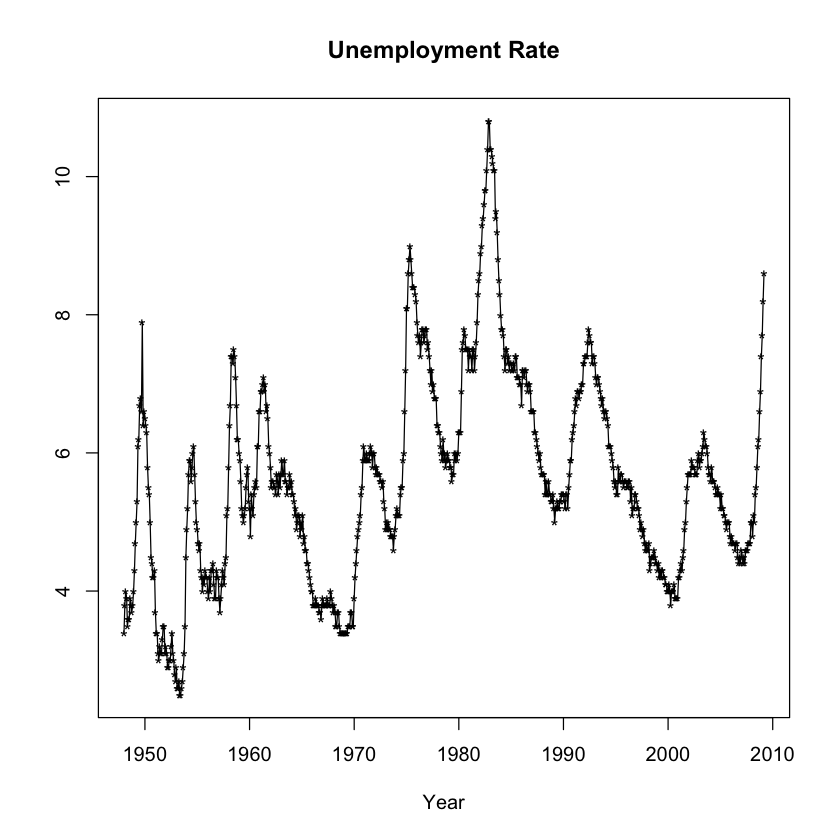

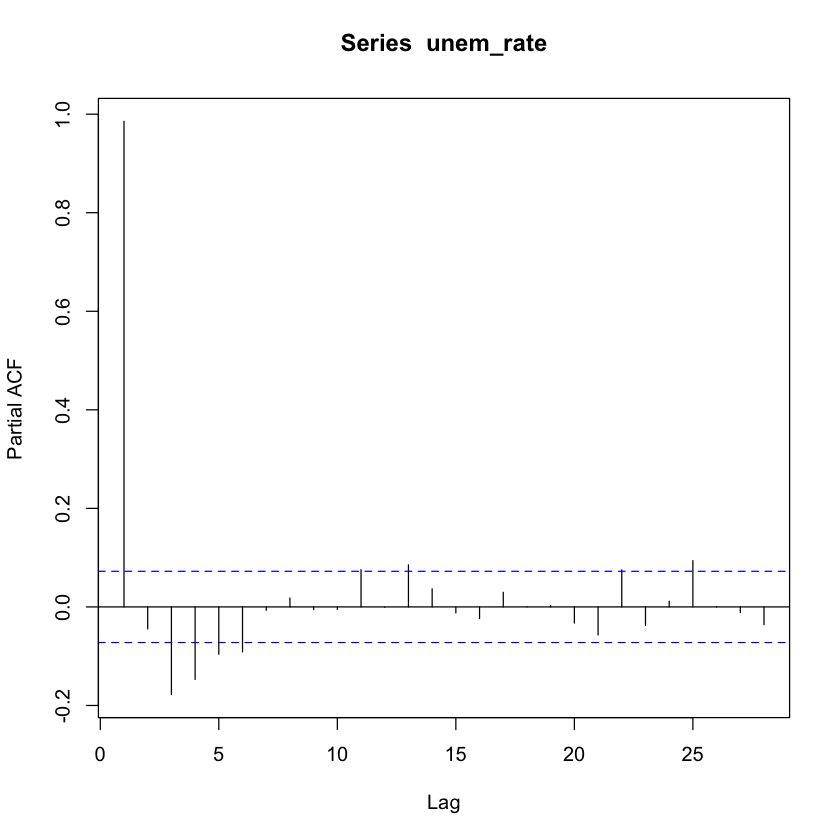

In [143]:
plot_time_fig(unem_rate_ts, main = "Unemployment Rate", xlab = "Year")
pacf(unem_rate)

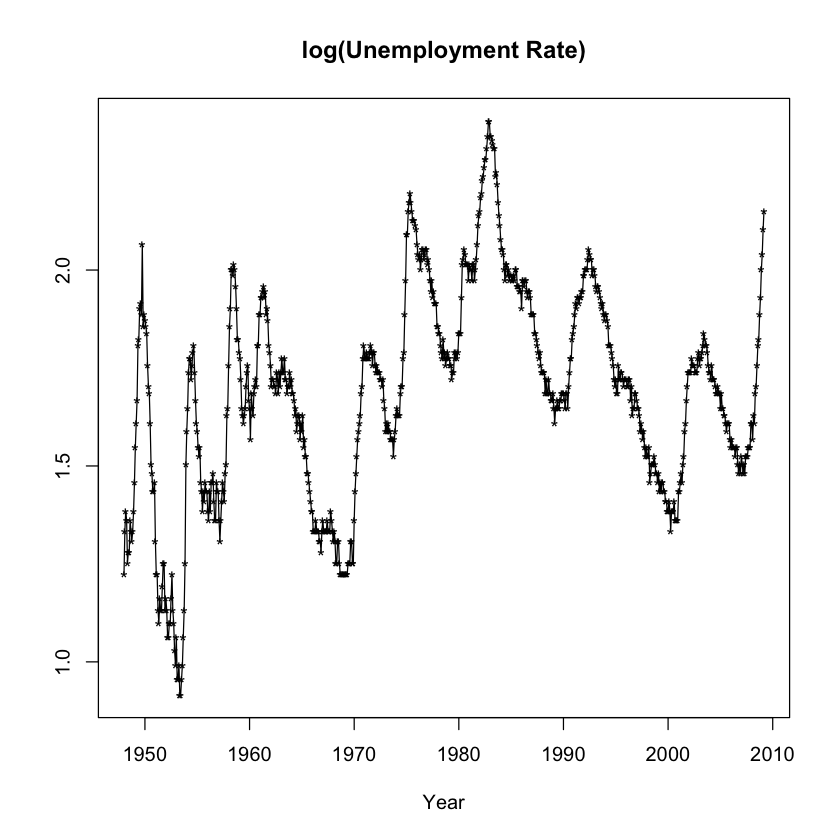

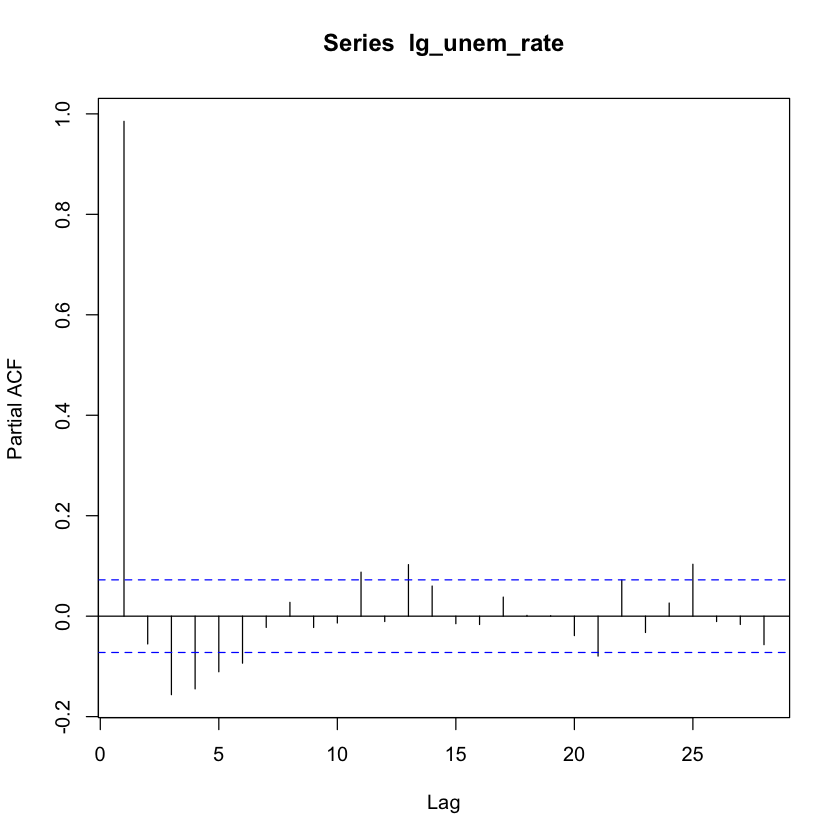

In [22]:
plot_time_fig(lg_unem_rate_ts, main = "log(Unemployment Rate)", xlab = "Year")
pacf(lg_unem_rate)

## Unit-root test
- ~~We can reject the null-hypothesis from ADF test. In other words, the process doesn't have unit-root.~~
- Seems like we cannot reject he null hypothesis when we use large enough lags in the ADF testing.
- Also from the ACF plots of the unemployment rate before and after taking difference, we can see that we need to take difference to cancel the strong serial correlation.
- From the ACF plot of the unemployment rate after taking difference, we see some damping sine and cosine wave, indicating that there could be some business cycle (pp42).

In [34]:
# "lags=12" is chosen from PACF plot
adf_test_res = adfTest(unem_rate_ts, lags = 12, type = c("ct"))
adf_test_res


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: -2.9715
  P VALUE:
    0.1671 

Description:
 Tue Feb 27 23:20:00 2024 by user: 

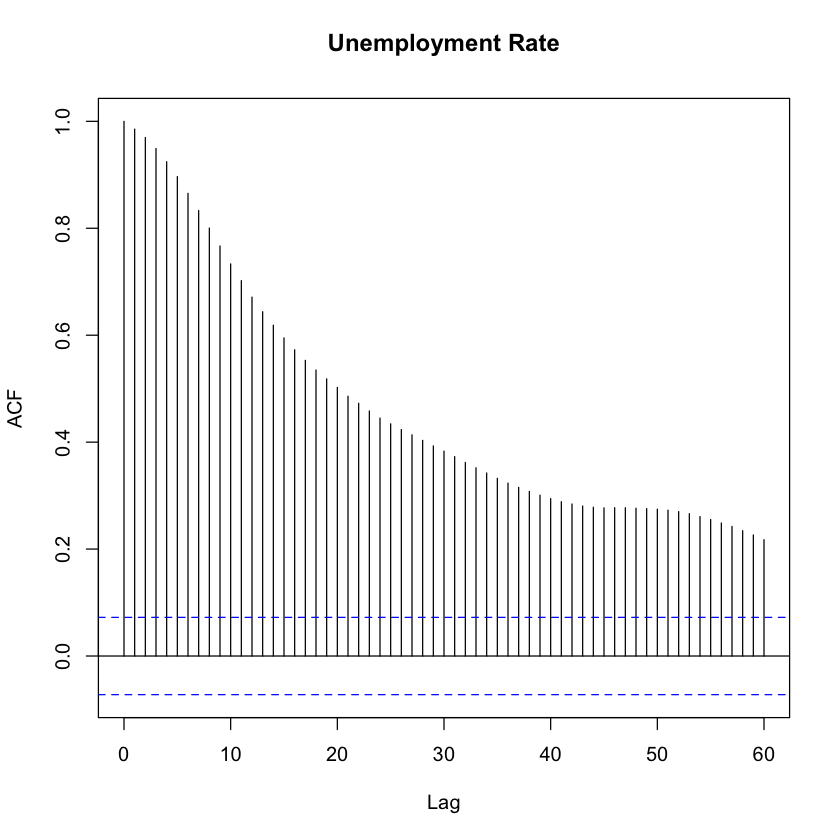

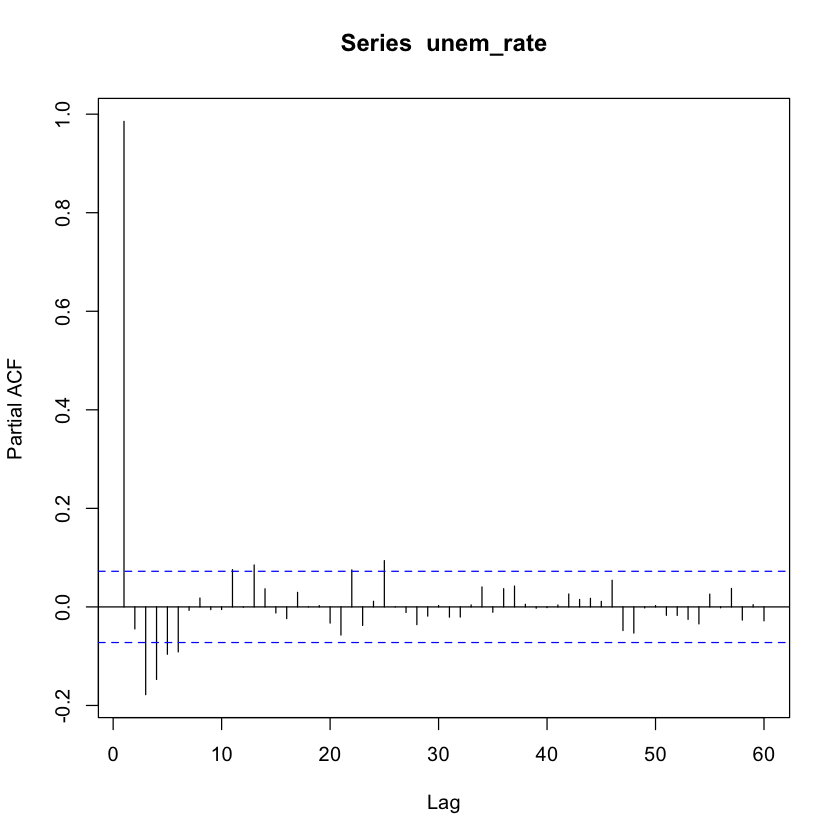

In [31]:
lag.max = 60
plot_acf(da = unem_rate, lag.max = lag.max, main = "Unemployment Rate")
pacf(unem_rate, lag.max = lag.max)

In [35]:
diff_unem_rate = diff(unem_rate)
diff_unem_rate_ts = ts(diff_unem_rate, frequency = 12, start = c(1948,2))

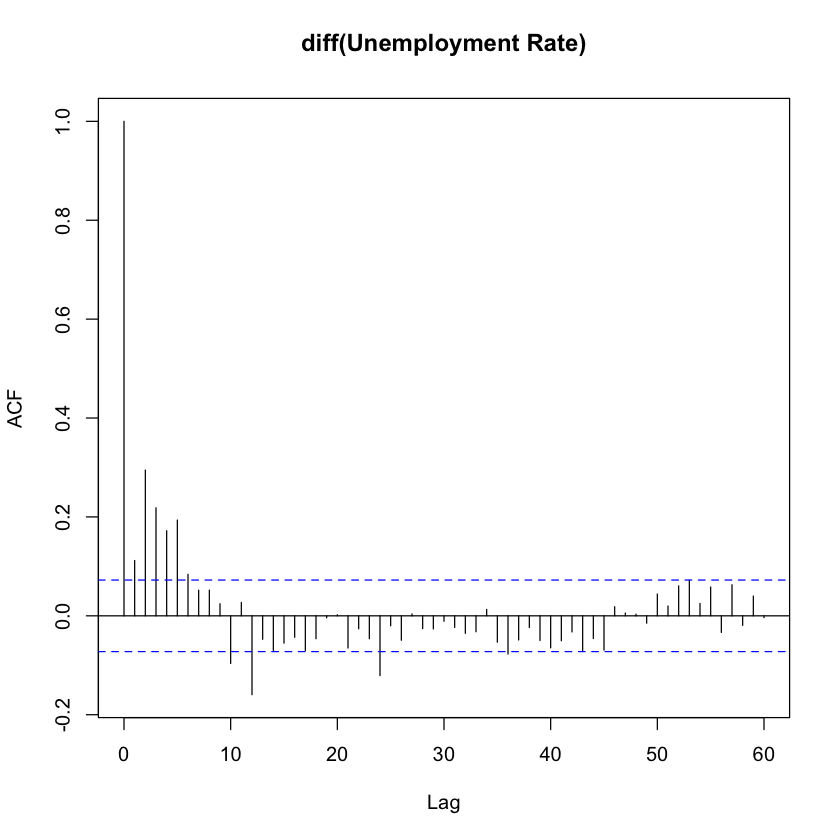

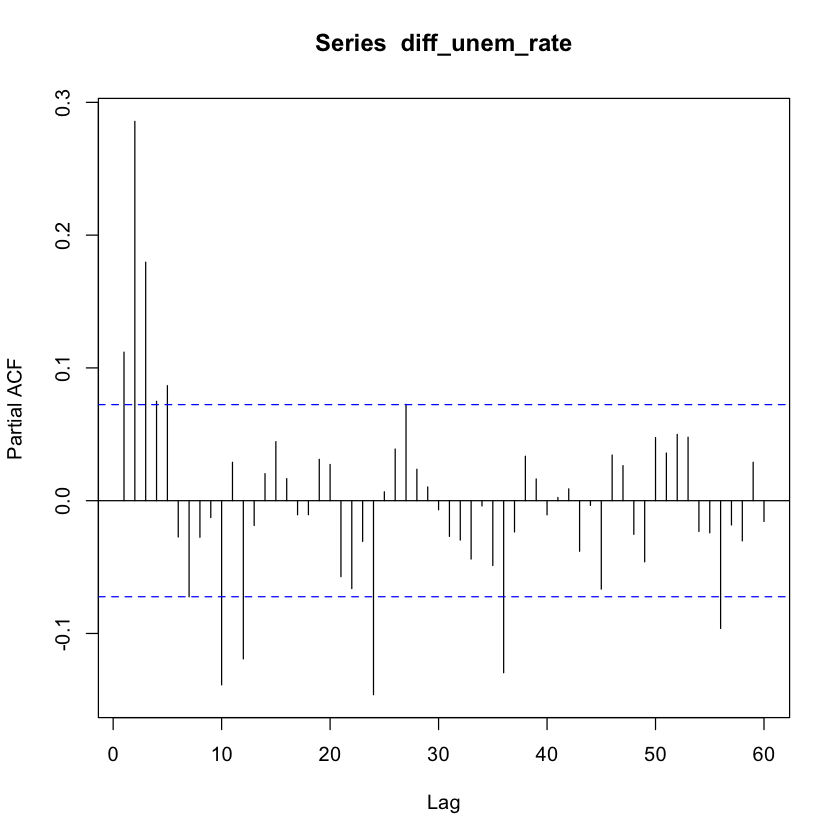

In [36]:
plot_acf(da = diff_unem_rate, lag.max = lag.max, main = "diff(Unemployment Rate)")
pacf(diff_unem_rate, lag.max = lag.max)

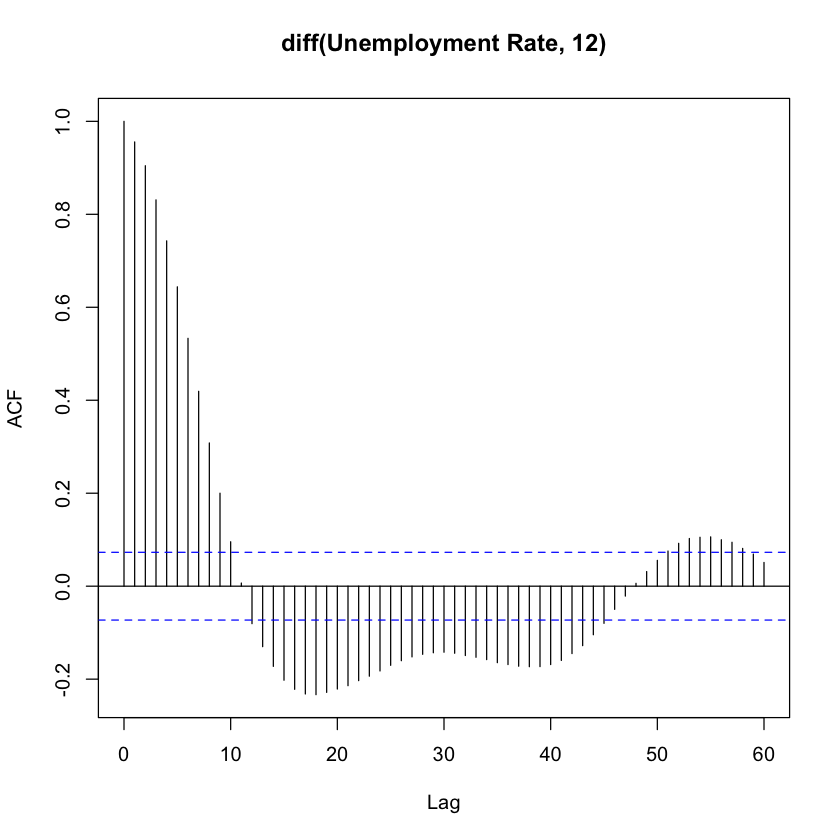

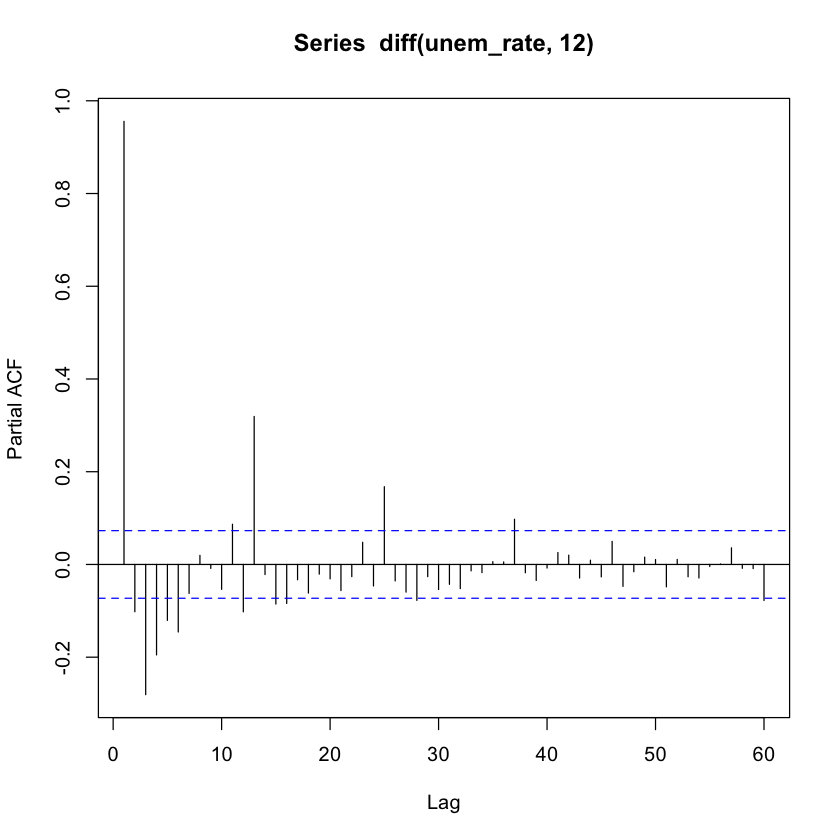

In [144]:
plot_acf(da = diff(unem_rate, 12), lag.max = lag.max, main = "diff(Unemployment Rate, 12)")
pacf(diff(unem_rate, 12), lag.max = lag.max)

## Order determination
- Try to use ARIMA(4, 1, 5) model.

In [172]:
perform_and_print_eacf <- function(da, ar.max, ma.max) {
    eacf_obj <- eacf(da, ar.max = ar.max, ma.max = ma.max)
    eacf_stats_tb = format(as.data.frame(eacf_obj$eacf), digits = 3)
    names(eacf_stats_tb) <- seq(from = 0, to = ma.max)
    display(eacf_stats_tb)
    display(eacf_obj$symbol)
    # pp67, asymptotic standard error of EACF
    display(2/sqrt(length(da)))
    c(eacf_obj, eacf_stats_tb)
}

In [173]:
unem_rate_eacf_res <- perform_and_print_eacf(diff_unem_rate, ar.max = 25, ma.max = 12)

,0,1,2,3,4,5,6,7,8,9,10,11,12
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,0.1119,0.29465,0.21842,0.17198,1.94e-01,8.39e-02,0.05184,0.051878,0.02445,-0.096187,0.026951,-0.1594,-0.047376
2,-0.3443,0.15698,-0.00881,-0.03887,1.07e-01,-3.19e-02,-0.01686,0.022971,0.00774,-0.077354,-0.024625,-0.1687,0.067674
3,-0.4642,0.13045,-0.01960,-0.02493,1.13e-01,-4.40e-02,-0.06191,0.004640,0.01418,-0.067424,0.002018,-0.1414,0.040126
4,-0.3650,-0.35458,0.02198,0.08834,9.75e-02,-5.66e-05,0.01257,-0.004783,0.01615,-0.066850,-0.018419,-0.1430,-0.070736
5,-0.4954,-0.30539,0.04120,0.30176,9.52e-02,-2.57e-03,0.01766,0.009470,0.04559,-0.042195,0.047631,-0.1245,-0.039347
6,0.2517,0.44829,0.07516,0.16677,1.08e-01,-8.10e-02,-0.01934,0.000521,0.06292,0.022652,-0.002533,-0.1239,-0.036224
7,-0.3005,0.35966,-0.13538,-0.00859,3.02e-01,-1.25e-01,-0.01774,0.001050,0.05707,0.012168,-0.005929,-0.1340,0.021891
8,-0.3330,-0.00552,-0.08958,-0.02068,1.83e-01,-1.10e-01,0.00728,-0.032169,0.06110,-0.009638,0.022461,-0.0940,0.004250
9,-0.3266,0.00149,-0.33486,-0.11095,1.03e-01,7.02e-02,0.24701,0.252584,-0.02356,-0.027958,0.056793,-0.0928,-0.000937


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,x,x,x,x,x,x,o,o,o,x,o,x,o
1,x,x,o,o,x,o,o,o,o,x,o,x,o
2,x,x,o,o,x,o,o,o,o,o,o,x,o
3,x,x,o,x,x,o,o,o,o,o,o,x,o
4,x,x,o,x,x,o,o,o,o,o,o,x,o
5,x,x,x,x,x,x,o,o,o,o,o,x,o
6,x,x,x,o,x,x,o,o,o,o,o,x,o
7,x,o,x,o,x,x,o,o,o,o,o,x,o
8,x,o,x,x,x,o,x,x,o,o,o,x,o
9,x,x,x,x,x,o,x,x,x,o,o,o,o


[1] 0.07382135

AR/MA
   0 1 2 3 4 5 6 7 8 9 10 11 12
0  x x x x x x o o o x o  x  o 
1  x x o o x o o o o x o  x  o 
2  x x o o x o o o o o o  x  o 
3  x x o x x o o o o o o  x  o 
4  x x o x x o o o o o o  x  o 
5  x x x x x x o o o o o  x  o 
6  x x x o x x o o o o o  x  o 
7  x o x o x x o o o o o  x  o 
8  x o x x x o x x o o o  x  o 
9  x x x x x o x x x o o  o  o 
10 x x x x x x o x x x o  x  o 
11 x x x x x x o x x x x  o  o 
12 x x x o o o x o x o o  x  o 
13 x x x x o o x o x o o  x  x 
14 x x x o o o o o x o o  x  x 
15 x x x o o o o o o o o  x  x 
16 x x x o x o o o o o o  x  x 
17 x x x o x o o o o o o  x  o 
18 x x x o o o o o o o o  x  x 
19 x x x o x o o o o o o  x  x 
20 x x x o o o o x o o o  x  x 
21 x x x o x o o o x x o  x  o 
22 x x o x x x x o x x o  x  x 
23 x x o x x x o x x x x  x  x 
24 x x x x x x o o x o x  x  x 
25 x o x x o x x o o o o  x  x 


## Fit an `ARIMA(3,1,5)` model

In [108]:
unem_rate_mod = stats::arima(unem_rate_ts, order = c(3,1,5), include.mean = F)
unem_rate_mod


Call:
stats::arima(x = unem_rate_ts, order = c(3, 1, 5), include.mean = F)

Coefficients:
        ar1     ar2      ar3      ma1      ma2     ma3     ma4     ma5
      0.671  0.7420  -0.7722  -0.6932  -0.5326  0.7862  -0.136  0.2068
s.e.  0.038  0.0289   0.0355   0.0505   0.0502  0.0493   0.049  0.0392

sigma^2 estimated as 0.03825:  log likelihood = 154.88,  aic = -291.77

In [110]:
unem_rate_mod_1 = arima(unem_rate_ts, order = c(3,1,5))
unem_rate_mod_1


Call:
arima(x = unem_rate_ts, order = c(3, 1, 5))

Coefficients:
        ar1     ar2      ar3      ma1      ma2     ma3     ma4     ma5
      0.671  0.7420  -0.7722  -0.6932  -0.5326  0.7862  -0.136  0.2068
s.e.  0.038  0.0289   0.0355   0.0505   0.0502  0.0493   0.049  0.0392

sigma^2 estimated as 0.03825:  log likelihood = 154.88,  aic = -293.77

In [111]:
diff_unem_rate_mod = arima(diff_unem_rate_ts, order = c(3,0,5), include.mean = F)
diff_unem_rate_mod


Call:
arima(x = diff_unem_rate_ts, order = c(3, 0, 5), include.mean = F)

Coefficients:
         ar1     ar2      ar3      ma1      ma2     ma3     ma4     ma5
      0.6711  0.7420  -0.7722  -0.6932  -0.5326  0.7862  -0.136  0.2068
s.e.  0.0379  0.0289   0.0355   0.0505   0.0502  0.0493   0.049  0.0392

sigma^2 estimated as 0.03825:  log likelihood = 154.88,  aic = -293.77

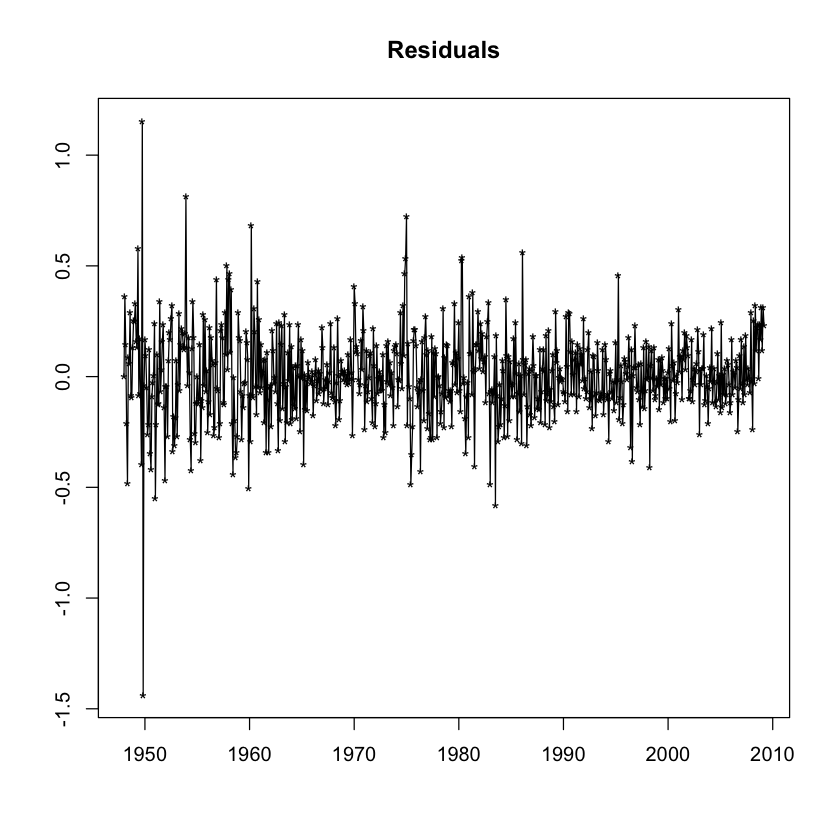

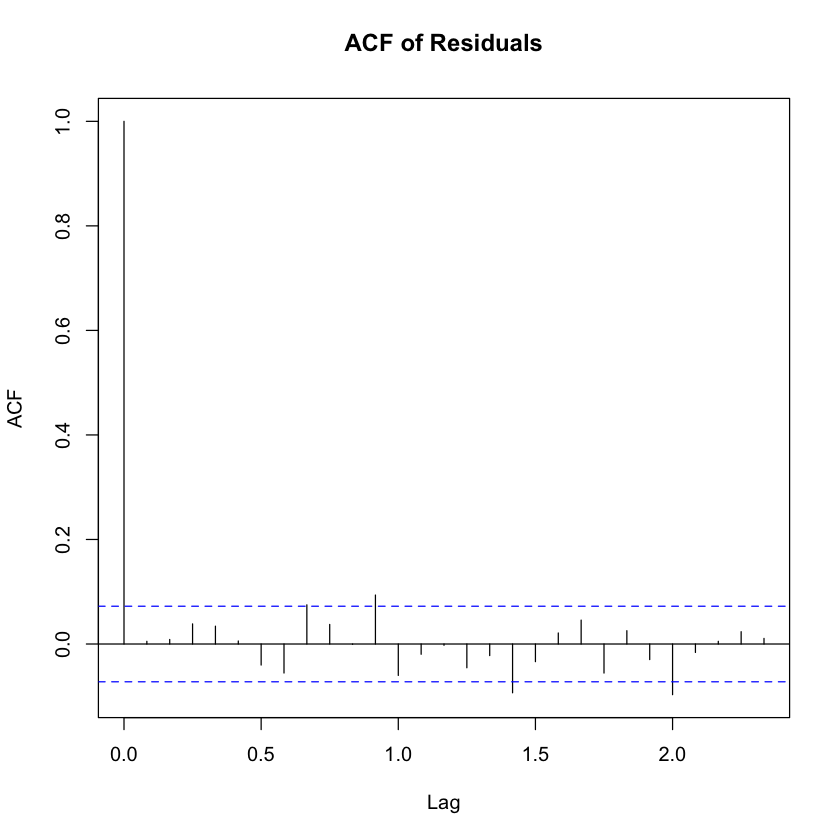

In [112]:
plot_time_fig(unem_rate_mod$residuals, main = "Residuals")
plot_acf(unem_rate_mod$residuals, main = "ACF of Residuals")

## Box-Ljung test
- pp33 very briefly talks about how to choose lag in the `Box.test`
- From the following testing result, we cannot reject the null-hypothesis. So the model specified is adequate.

In [113]:
length(unem_rate); log(length(unem_rate))

[1] 735

[1] 6.59987

In [114]:
Box.test(unem_rate_mod$residuals, lag = 7, type = 'Ljung')


	Box-Ljung test

data:  unem_rate_mod$residuals
X-squared = 5.5481, df = 7, p-value = 0.5934


In [115]:
Box.test(unem_rate_mod$residuals, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  unem_rate_mod$residuals
X-squared = 20.042, df = 12, p-value = 0.06629


- Diagnose time-series ARIMA model

In [161]:
help(tsdiag)

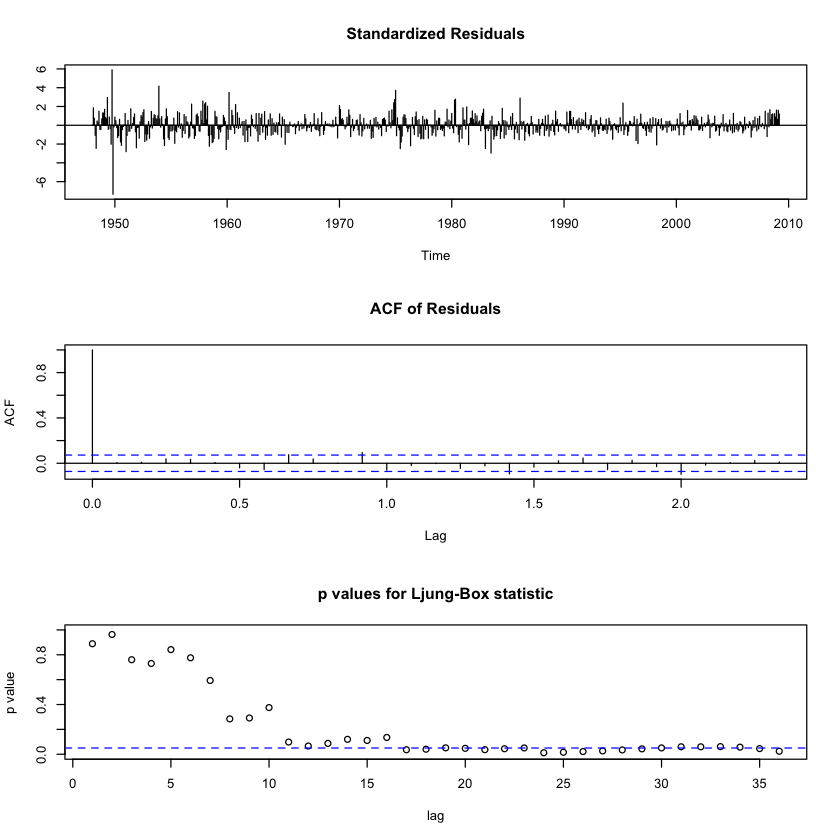

In [162]:
par(bg = 'white')
tsdiag(unem_rate_mod, gof.lag=36)

## Check business cycle
- pp42
- Compute the average length of business cycles
- Doesn't matter if using the characteristic roots or the inverse of them.
- Unit is "month". Average business cycle is about 14.2 months, which seems to be shoter than expected from the time plot above.
    - The business cycle is very sensitive to the order chosen in fitting ARIMA model. When I use ARIMA(2,0,5) or ARIMA(4,0,5), the business cycle doens't exist or too short.

In [69]:
find('arima')

[1] "package:TSA"   "package:stats"

In [79]:
help("arima", package = "TSA")

In [80]:
help("arima", package = "stats")

In [116]:
sqrt(unem_rate_mod$sigma2)

[1] 0.1955666

In [117]:
unem_rate_mod$coef

ar1        ar2        ar3        ma1        ma2        ma3        ma4 
 0.6710393  0.7419784 -0.7721842 -0.6931712 -0.5326340  0.7862167 -0.1359549 
       ma5 
 0.2067644

In [118]:
ar_poly = c(1, -unem_rate_mod$coef[1:3]) # Characteristic equation for AR process
roots = polyroot(ar_poly)
roots

[1]  1.004373+0.476561i -1.047863-0.000000i  1.004373-0.476561i

In [119]:
for (i in 1:3) {
    print(paste("====", i))
    print(as.numeric(Mod(1-unem_rate_mod$coef[1]*roots[i]-unem_rate_mod$coef[2]*roots[i]^2-unem_rate_mod$coef[3]*roots[i]^3-unem_rate_mod$coef[4]*roots[i]^4)))
    print(as.numeric(Mod(roots[i])))
}

[1] "==== 1"
[1] 1.058741
[1] 1.111699
[1] "==== 2"
[1] 0.8357151
[1] 1.047863
[1] "==== 3"
[1] 1.058741
[1] 1.111699


- Modulus of roots

In [120]:
roots; Mod(roots)

[1]  1.004373+0.476561i -1.047863-0.000000i  1.004373-0.476561i

[1] 1.111699 1.047863 1.111699

In [121]:
1/roots; Mod(1/roots)

[1]  0.8126813-0.3856063i -0.9543234+0.0000000i  0.8126813+0.3856063i

[1] 0.8995238 0.9543234 0.8995238

- Compute the average length of business cycles
- Doesn't matter if using the characteristic roots or the inverse of them.

In [122]:
roots[1]; Re(roots[1]); Im(roots[1])

[1] 1.004373+0.476561i

[1] 1.004373

[1] 0.4765613

In [125]:
k = 2*pi/acos(Re(roots[1])/Mod(roots[1]))
k

[1] 14.18233

In [126]:
k = 2*pi/acos(Re(1/roots[1])/Mod(1/roots[1]))
k

[1] 14.18233

## Forecast

In [128]:
length(unem_rate_ts); unem_rate_ts

[1] 735

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7
1953,2.9,2.6,2.6,2.7,2.5,2.5,2.6,2.7,2.9,3.1,3.5,4.5
1954,4.9,5.2,5.7,5.9,5.9,5.6,5.8,6.0,6.1,5.7,5.3,5.0
1955,4.9,4.7,4.6,4.7,4.3,4.2,4.0,4.2,4.1,4.3,4.2,4.2
1956,4.0,3.9,4.2,4.0,4.3,4.3,4.4,4.1,3.9,3.9,4.3,4.2
1957,4.2,3.9,3.7,3.9,4.1,4.3,4.2,4.1,4.4,4.5,5.1,5.2


[1] 734
2008.5 ; 2009.583

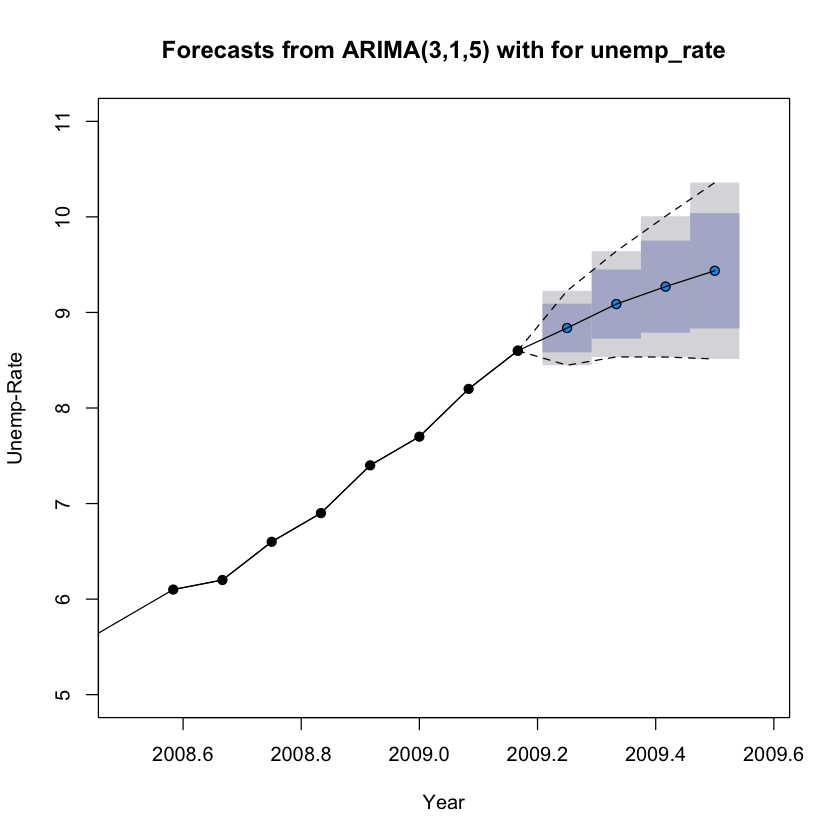

In [140]:
npts = 8
eotr = length(unem_rate_ts)
h = 4
freq = 12
order = c(3,1,5)
fixed = NULL
seasonal = list(order = c(0L, 0L, 0L), period = NA)
unem_rate_fc_res = plot_forecast_fig(
    da_ts=unem_rate_ts, eotr=eotr, h=h, npts=npts, frequency=freq, 
    order=order, seasonal=seasonal, fixed=fixed, method='ML', 
    include.mean=F, transform.pars=NULL,
    main="Forecasts from ARIMA(3,1,5) with for unemp_rate", 
    xlab="Year", ylab="Unemp-Rate", ylim=c(5, 11)
)

## Alternative solutions (only use AR model)

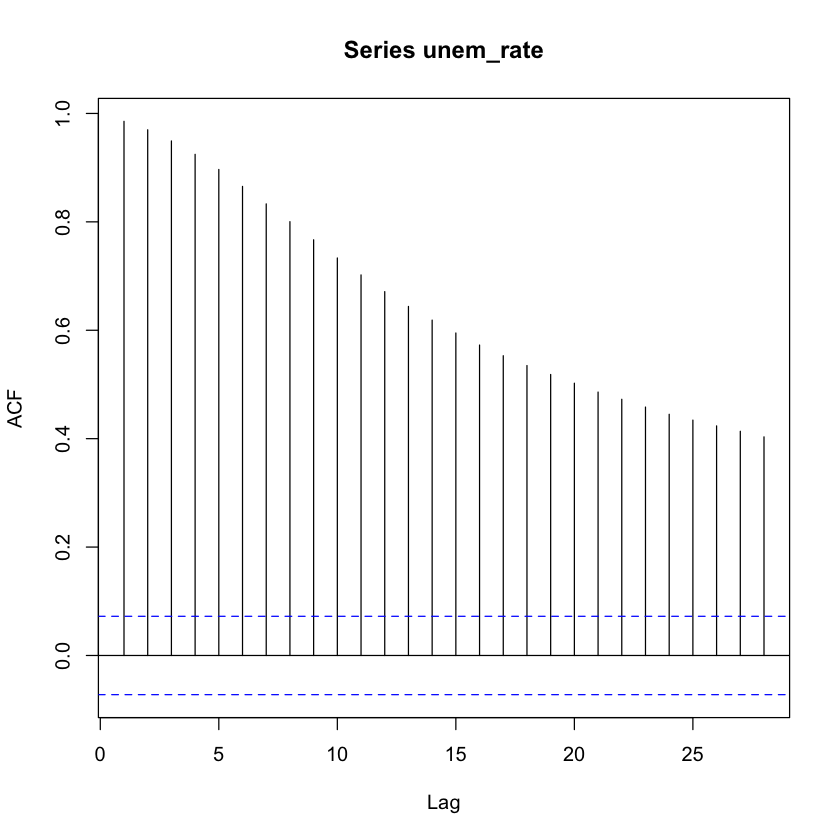

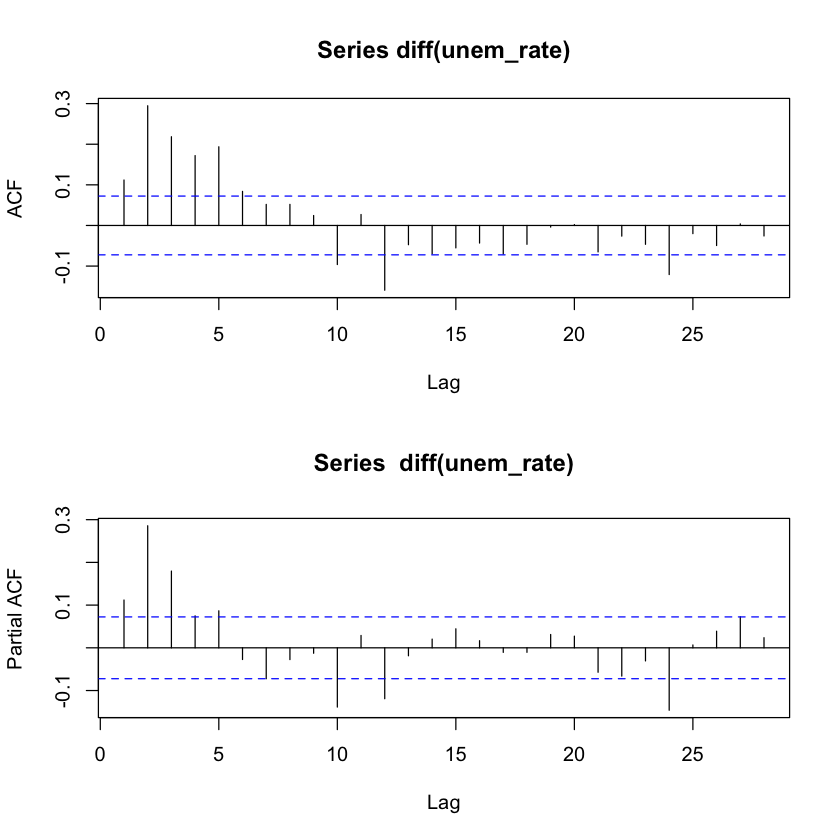

order = 11 



Call:
arima(x = unem_rate_ts, order = c(11, 0, 0))

Coefficients:
         ar1     ar2      ar3      ar4     ar5      ar6      ar7     ar8
      0.9886  0.2375  -0.0741  -0.0630  0.0301  -0.1283  -0.0426  0.0539
s.e.  0.0367  0.0516   0.0525   0.0525  0.0526   0.0524   0.0526  0.0527
          ar9     ar10    ar11  intercept
      -0.0146  -0.1293  0.1259     5.6554
s.e.   0.0526   0.0518  0.0371     0.4422

sigma^2 estimated as 0.03867:  log likelihood = 150.03,  aic = -276.07

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = unem_rate_ts, order = c(11, 0, 0), fixed = c(NA, NA, 0, 0, 0, NA, 
    0, 0, 0, NA, NA, NA))

Coefficients:
         ar1     ar2  ar3  ar4  ar5      ar6  ar7  ar8  ar9     ar10    ar11
      0.9805  0.1695    0    0    0  -0.1728    0    0    0  -0.1216  0.1282
s.e.  0.0361  0.0432    0    0    0   0.0270    0    0    0   0.0433  0.0364
      intercept
         5.6605
s.e.     0.4337

sigma^2 estimated as 0.03904:  log likelihood = 146.55,  aic = -281.11


Call:
arima(x = unem_rate_ts, order = c(2, 1, 1), seasonal = list(order = c(1, 0, 
    1), period = 12))

Coefficients:
         ar1     ar2      ma1    sar1     sma1
      0.5801  0.2444  -0.5813  0.5609  -0.8185
s.e.  0.0637  0.0398   0.0588  0.0734   0.0538

sigma^2 estimated as 0.03725:  log likelihood = 164.28,  aic = -318.56

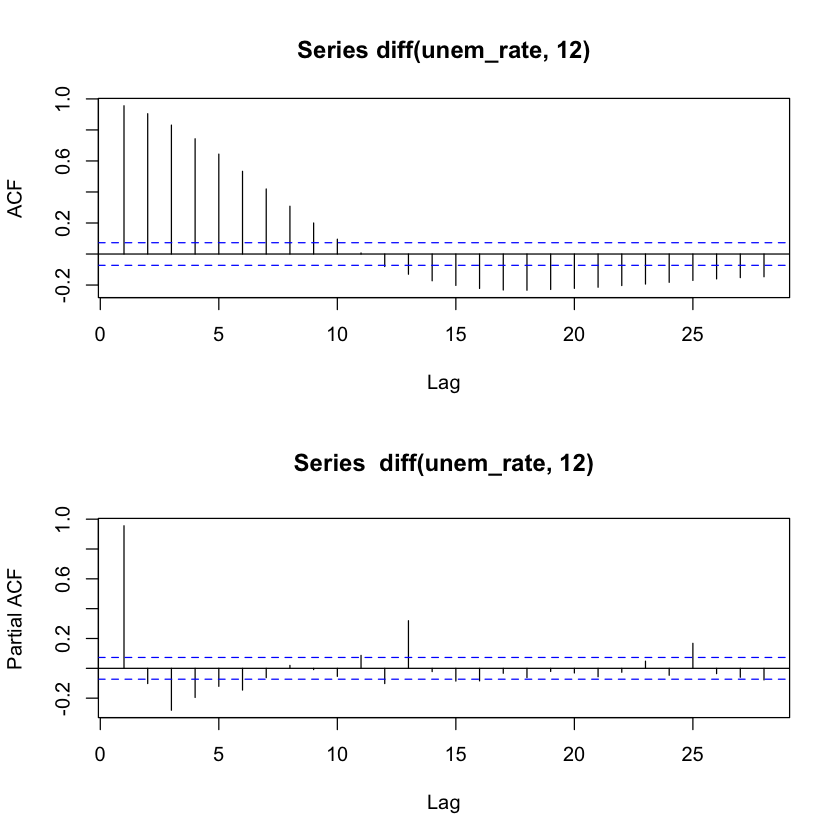

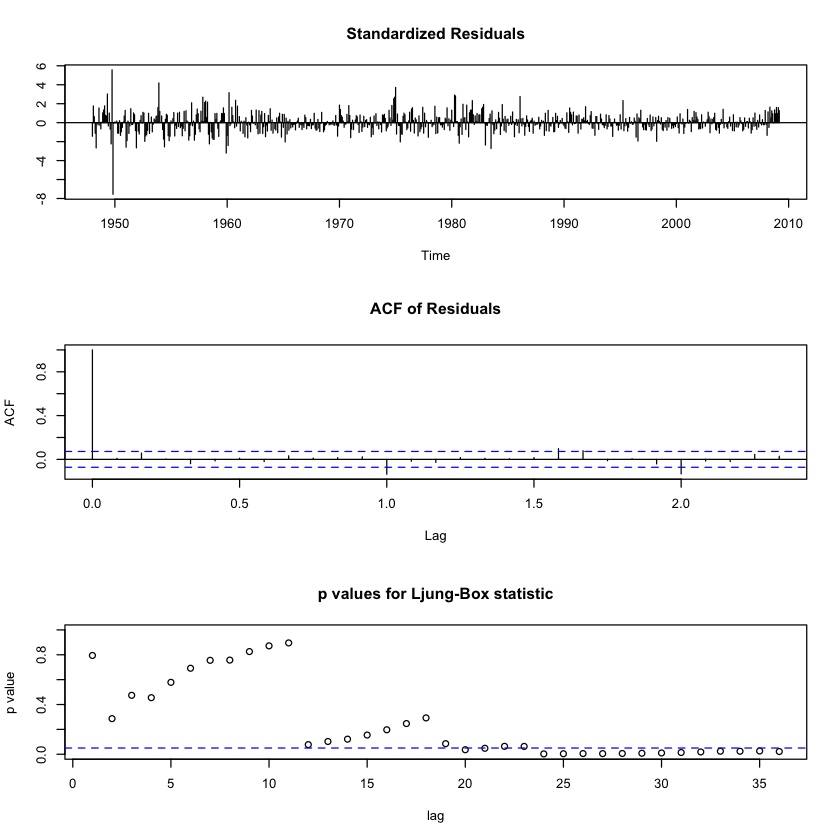

,Apr,May,Jun,Jul
2009,8.796765,8.981996,9.112555,9.246428
,Apr,May,Jun,Jul
2009,0.1975856,0.2767134,0.3556580,0.4358310


,Apr,May,Jun,Jul
2009,8.841844,9.017154,9.126917,9.231977
,Apr,May,Jun,Jul
2009,0.1930098,0.2728039,0.3632395,0.4508560


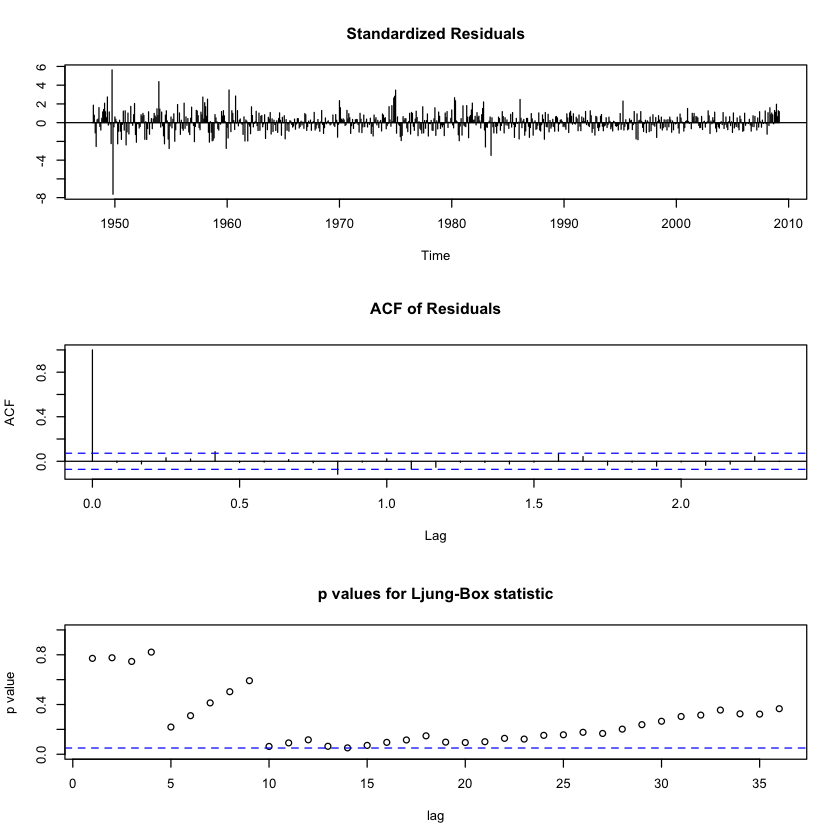

In [147]:
par(bg = 'white')
# decay slowly
acf(unem_rate)
par(mfrow = c(2, 1))
acf(diff(unem_rate))
pacf(diff(unem_rate))
acf(diff(unem_rate, 12))
pacf(diff(unem_rate, 12))
cat("order =", ar(unem_rate, method = 'mle')$order, "\n")
m1 = arima(unem_rate_ts, order = c(11, 0, 0))
m1
# Follow the pp51 to modify and refine model based on previous fit
m1 = arima(unem_rate_ts, order = c(11, 0, 0), fixed = c(NA, NA, 0, 0, 0, NA, 0, 0, 0, NA, NA, NA))
m1
# FIXME
m2 = arima(unem_rate_ts, order = c(2, 1, 1), seasonal = list(order = c(1, 0, 1), period = 12))
m2
tsdiag(m1, gof = 36)
tsdiag(m2, gof = 36)
predict(m1, 4)
predict(m2, 4)

In [149]:
ar_poly_1 = c(1, -m1$coef[1:11]) # Characteristic equation for AR process
roots_1 = polyroot(ar_poly_1)
roots_1

[1]  0.7213096+1.0870135i -1.1427487+0.3989529i -0.7723762-0.9739137i
 [4]  1.1354496+0.2017578i  0.0144528+1.2121540i -0.7723762+0.9739137i
 [7]  0.0144528-1.2121540i  1.0357787+0.0000000i  1.1354496-0.2017578i
[10] -1.1427487-0.3989529i  0.7213096-1.0870135i

In [155]:
Im(roots_1[8])

[1] 3.318044e-15

In [156]:
for (i in 1:length(roots_1)) {
    if (abs(Im(roots_1[i]))>1e-8) {
        print(i)
        print(roots_1[i])
        print(2*pi/acos(Re(roots_1[i])/Mod(roots_1[i])))
    }
}

[1] 1
[1] 0.72131+1.087013i
[1] 6.379253
[1] 2
[1] -1.142749+0.398953i
[1] 2.239432
[1] 3
[1] -0.7723762-0.9739137i
[1] 2.803374
[1] 4
[1] 1.13545+0.201758i
[1] 35.72949
[1] 5
[1] 0.014453+1.212154i
[1] 4.030593
[1] 6
[1] -0.7723762+0.9739137i
[1] 2.803374
[1] 7
[1] 0.014453-1.212154i
[1] 4.030593
[1] 9
[1] 1.13545-0.201758i
[1] 35.72949
[1] 10
[1] -1.142749-0.398953i
[1] 2.239432
[1] 11
[1] 0.72131-1.087013i
[1] 6.379253


In [151]:
ar_poly_2 = c(1, -m2$coef[1:2]) # Characteristic equation for AR process
roots_2 = polyroot(ar_poly_2)
roots_2

[1]  1.158427+0i -3.532363-0i

# 2-4

In [3]:
da = read.table("../AFTS_data/Ch02/m-deciles08.txt", header = T)
dim(da); da[1:5,]

[1] 468   5

,date,CAP1RET,CAP2RET,CAP9RET,CAP10RET
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19700130,0.054383,-0.004338,-0.073082,-0.076874
2,19700227,0.020264,0.020155,0.064185,0.059512
3,19700331,-0.031790,-0.028090,-0.004034,-0.001327
4,19700430,-0.184775,-0.193004,-0.115825,-0.091112
5,19700529,-0.088189,-0.085342,-0.085565,-0.053193


In [4]:
dec2_ts = ts(da$CAP2RET, frequency = 12, start = c(1970, 1))
dec10_ts = ts(da$CAP10RET, frequency = 12, start = c(1970, 1))

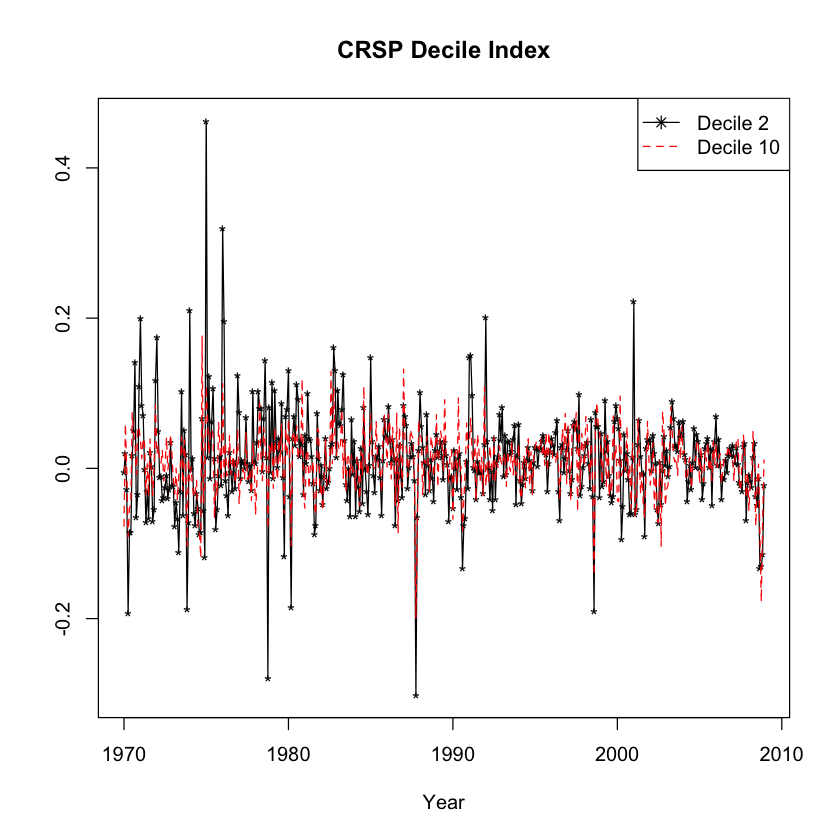

In [5]:
plot_time_fig(dec2_ts, main = "CRSP Decile Index", xlab = "Year")
lines(dec10_ts, type = , col = 'red', lty = 2)
legend(
    "topright", 
    legend = c("Decile 2", "Decile 10"), 
    col = c("black", "red"), 
    lty = c(1, 2),
    pch = c(8, NA)
)

## (a) Test autocorrelations
- Reject the null-hypothesis (i.e., the first 12 lags have no serial correlation) for Decile 2. So for Decile 2, the first 12 lags have serial correlation.
- Cannot reject the null-hypothesis for Decile 10. So for Decile 10, the first 12 lags have no significant serial correlation.


	Box-Ljung test

data:  da$CAP2RET
X-squared = 55.736, df = 12, p-value = 1.335e-07


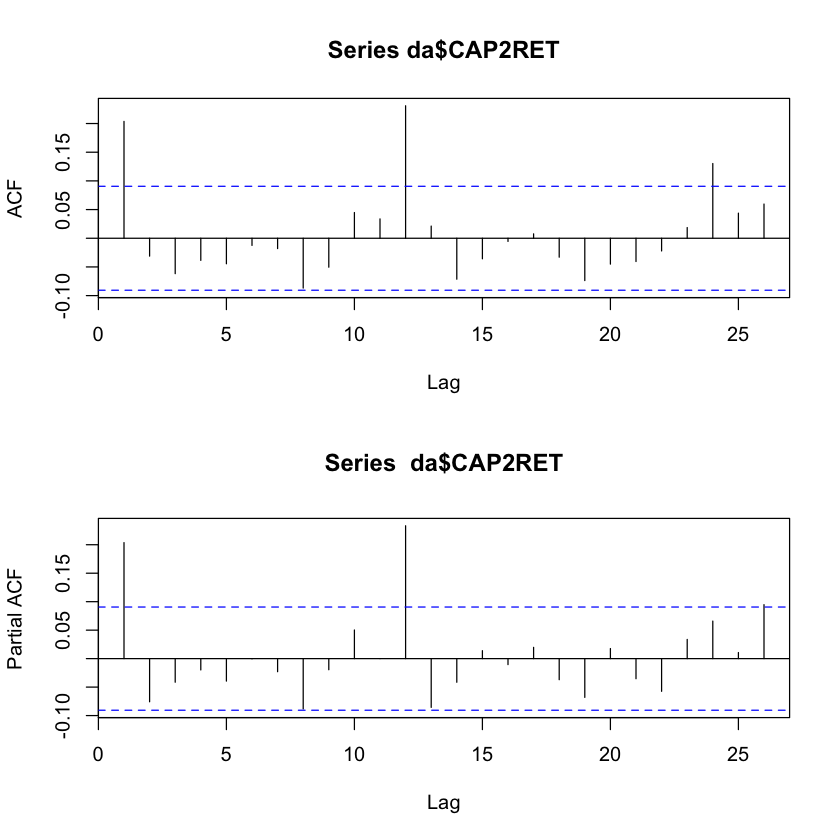

In [6]:
par(mfrow = c(2, 1), bg = 'white')
acf(da$CAP2RET)
pacf(da$CAP2RET)
Box.test(da$CAP2RET, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  da$CAP10RET
X-squared = 10.687, df = 12, p-value = 0.5559


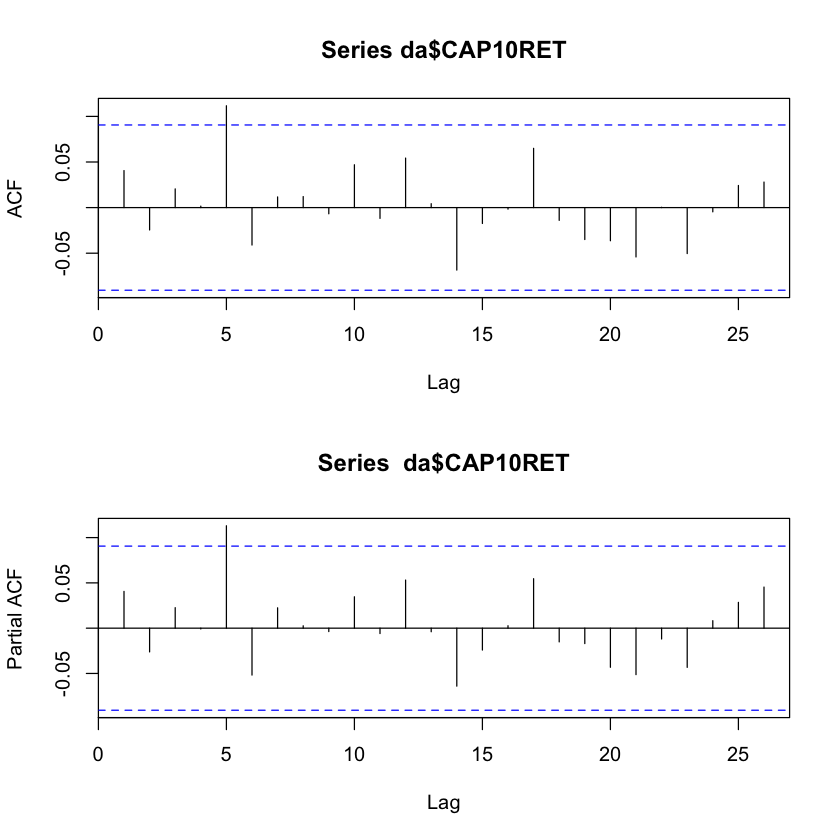

In [7]:
par(mfrow = c(2, 1), bg = 'white')
acf(da$CAP10RET)
pacf(da$CAP10RET)
Box.test(da$CAP10RET, lag = 12, type = 'Ljung')

## (b) Fit a model and perform model checking

In [8]:
dec2_eacf_res <- perform_and_print_eacf(da$CAP2RET, ar.max = 25, ma.max = 12)

,0,1,2,3,4,5,6,7,8,9,10,11,12
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,0.20369,-0.03114,-0.0617,-0.03854,-0.04448,-0.01246,-1.80e-02,-0.08682,-0.05043,0.044819,0.03371,0.23095,0.02117
2,0.32892,-0.10631,-0.0375,0.01921,-0.03447,0.02160,3.98e-03,-0.06861,-0.05926,0.066053,-0.00460,0.23682,0.06396
3,-0.42524,0.01475,-0.1102,-0.01244,-0.01521,0.00803,7.46e-03,-0.04457,-0.04307,0.020265,0.01009,0.23522,-0.05571
4,-0.40167,-0.05250,-0.0518,0.06362,-0.00120,0.01725,2.15e-03,-0.02434,-0.00964,0.024374,-0.02813,0.23364,-0.13191
5,-0.40022,-0.43254,-0.2838,-0.00515,-0.03041,0.01686,2.73e-03,-0.00353,-0.02382,-0.007906,-0.00472,0.23347,-0.06624
6,-0.06468,-0.43194,-0.1068,0.12936,-0.06677,-0.04765,-4.82e-03,0.00172,-0.02487,0.000663,-0.00560,0.23064,-0.03428
7,-0.10539,-0.02918,-0.3781,-0.13146,-0.13792,0.01120,-1.39e-02,-0.00394,-0.02474,-0.006610,-0.00960,0.21633,-0.12140
8,-0.25901,0.04140,-0.3007,0.12273,-0.00148,-0.11108,-4.85e-05,0.03159,0.00131,-0.003169,-0.02814,0.17372,-0.12466
9,-0.24123,0.39312,-0.2237,0.09617,-0.00180,-0.10194,6.02e-05,0.02881,0.01067,-0.003566,-0.03400,0.15280,-0.10936


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,x,o,o,o,o,o,o,o,o,o,o,x,o
1,x,x,o,o,o,o,o,o,o,o,o,x,o
2,x,o,x,o,o,o,o,o,o,o,o,x,o
3,x,o,o,o,o,o,o,o,o,o,o,x,x
4,x,x,x,o,o,o,o,o,o,o,o,x,o
5,o,x,x,x,o,o,o,o,o,o,o,x,o
6,x,o,x,x,x,o,o,o,o,o,o,x,x
7,x,o,x,x,o,x,o,o,o,o,o,x,x
8,x,x,x,x,o,x,o,o,o,o,o,x,x
9,x,x,o,x,o,o,x,o,o,o,o,o,x


[1] 0.09245003

AR/MA
   0 1 2 3 4 5 6 7 8 9 10 11 12
0  x o o o o o o o o o o  x  o 
1  x x o o o o o o o o o  x  o 
2  x o x o o o o o o o o  x  o 
3  x o o o o o o o o o o  x  x 
4  x x x o o o o o o o o  x  o 
5  o x x x o o o o o o o  x  o 
6  x o x x x o o o o o o  x  x 
7  x o x x o x o o o o o  x  x 
8  x x x x o x o o o o o  x  x 
9  x x o x o o x o o o o  o  x 
10 o x o x x o x o o o o  o  x 
11 o x x x o o x x o x x  o  o 
12 x x o o o o x x x x o  o  o 
13 x x x o o o x x o x o  x  o 
14 x o o o o o x x o x o  o  o 
15 x o o o o o x o x o o  o  o 
16 x x o o o o o o o o x  o  o 
17 x o x o x o x o o o x  o  o 
18 x x x x x o o x o o x  o  o 
19 x x x x x x o o o o o  o  o 
20 x x x x x x o x o o o  o  o 
21 x x x x x o x o o o o  o  o 
22 x x x o x x x o o o o  o  o 
23 x x x x x x x o x x o  o  o 
24 x x o x x x x x o x o  x  o 
25 x x o x x x x x o x o  x  o 


- Fit `ARIMA(1,0,1)` model


Call:
arima(x = da$CAP2RET, order = c(1, 0, 1), include.mean = T)

Coefficients:
          ar1     ma1  intercept
      -0.0260  0.2433     0.0105
s.e.   0.1773  0.1702     0.0036

sigma^2 estimated as 0.004077:  log likelihood = 623.48,  aic = -1240.96


	Box-Ljung test

data:  dec2_mod_1$residuals
X-squared = 36.405, df = 12, p-value = 0.0002788


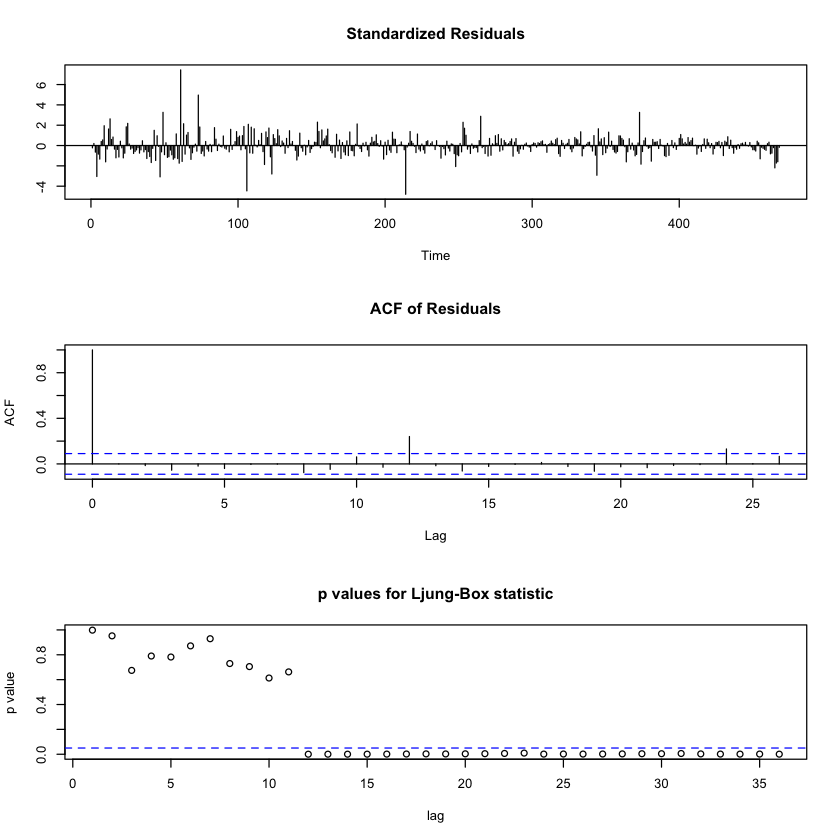

In [10]:
dec2_mod_1 <- arima(da$CAP2RET, order = c(1, 0, 1), include.mean = T)
dec2_mod_1; Box.test(dec2_mod_1$residuals, lag = 12, type = 'Ljung');
par(bg = 'white')
tsdiag(dec2_mod_1, gof.lag = 36)


Call:
arima(x = da$CAP2RET, order = c(0, 0, 1), include.mean = T)

Coefficients:
         ma1  intercept
      0.2191     0.0105
s.e.  0.0449     0.0036

sigma^2 estimated as 0.004077:  log likelihood = 623.47,  aic = -1242.93


	Box-Ljung test

data:  dec2_mod_2$residuals
X-squared = 8.1094, df = 10, p-value = 0.6182


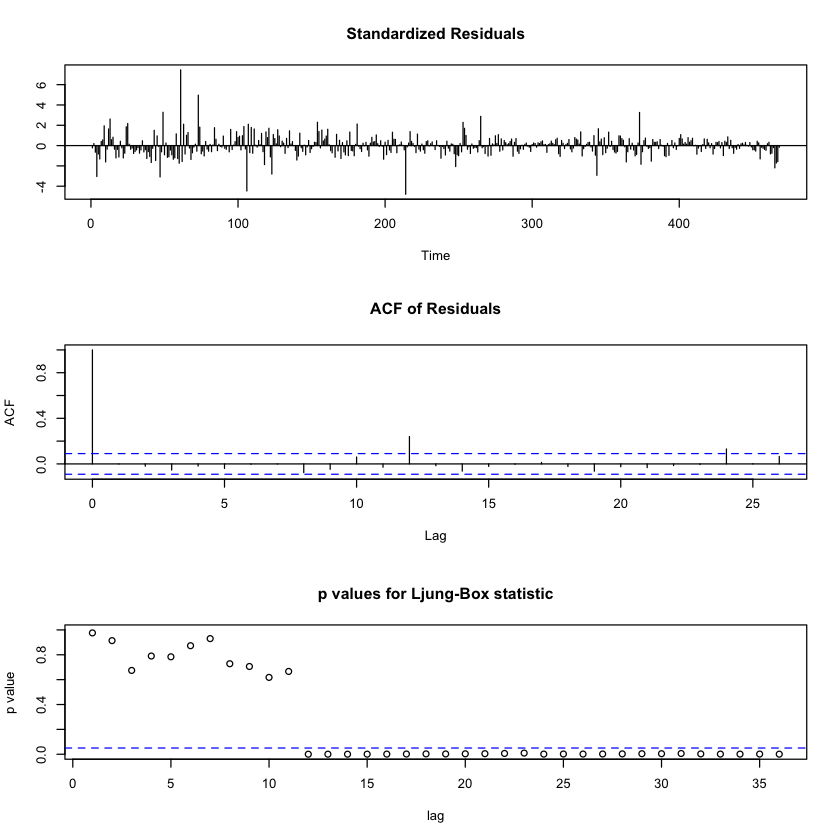

In [11]:
dec2_mod_2 <- arima(da$CAP2RET, order = c(0, 0, 1), include.mean = T)
dec2_mod_2; Box.test(dec2_mod_2$residuals, lag = 10, type = 'Ljung');
par(bg = 'white')
tsdiag(dec2_mod_2, gof.lag = 36)


Call:
arima(x = da$CAP2RET, order = c(4, 0, 3), include.mean = T)

Coefficients:
         ar1     ar2      ar3     ar4      ma1      ma2     ma3  intercept
      0.7561  0.7891  -0.7599  0.2034  -0.5337  -0.9888  0.5226     0.0117
s.e.  0.6190  0.1121   0.6092  0.1197   0.6306   0.0121  0.6263     0.0013

sigma^2 estimated as 0.003948:  log likelihood = 629.86,  aic = -1243.71


	Box-Ljung test

data:  dec2_mod_3$residuals
X-squared = 30.035, df = 12, p-value = 0.002759


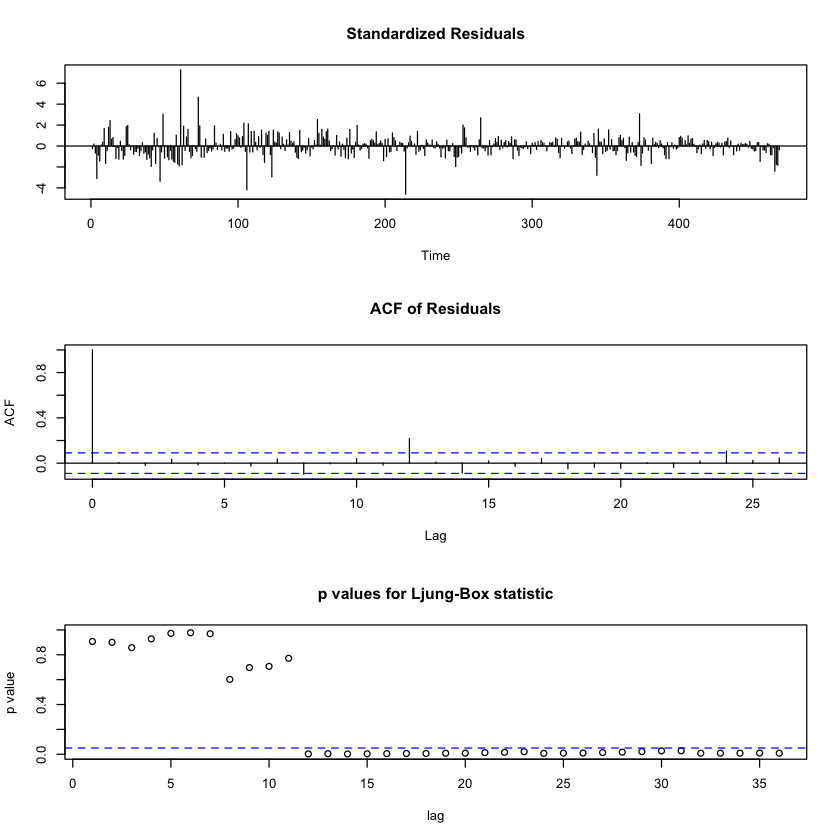

In [12]:
dec2_mod_3 <- arima(da$CAP2RET, order = c(4, 0, 3), include.mean = T)
dec2_mod_3; Box.test(dec2_mod_3$residuals, lag = 12, type = 'Ljung');
par(bg = 'white')
tsdiag(dec2_mod_3, gof.lag = 36)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = da$CAP2RET, order = c(4, 0, 3), include.mean = T, fixed = c(0, NA, 
    0, NA, 0, NA, 0, NA))

Coefficients:
      ar1     ar2  ar3      ar4  ma1      ma2  ma3  intercept
        0  0.3407    0  -0.0362    0  -0.3752    0     0.0106
s.e.    0  0.3787    0   0.0507    0   0.3767    0     0.0027

sigma^2 estimated as 0.004255:  log likelihood = 613.47,  aic = -1218.94


	Box-Ljung test

data:  dec2_mod_3$residuals
X-squared = 51.445, df = 12, p-value = 7.773e-07


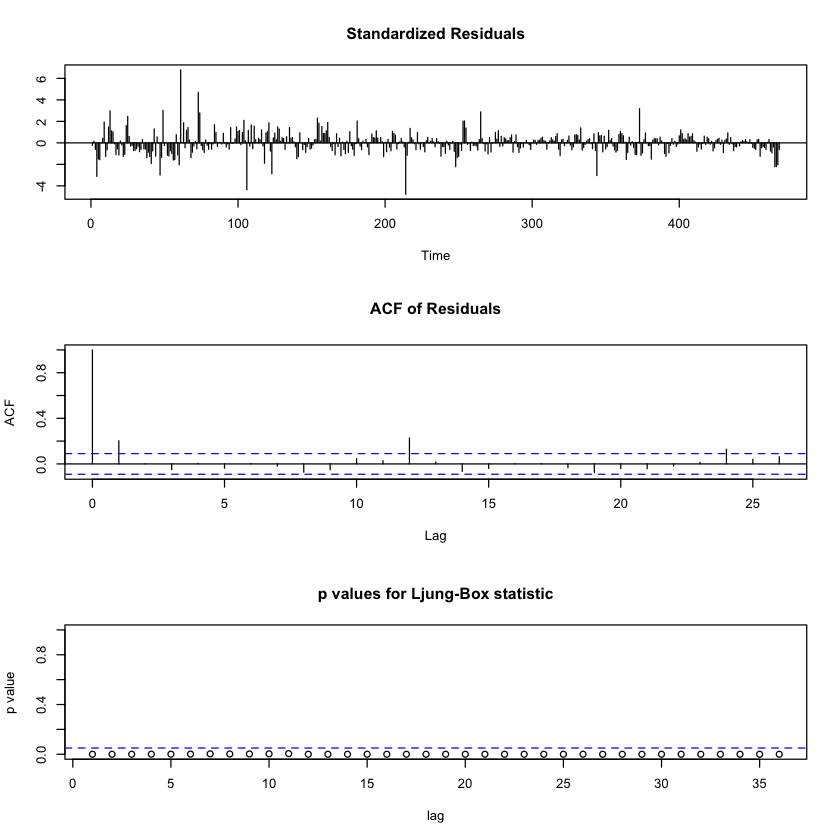

In [13]:
dec2_mod_3 <- arima(
    da$CAP2RET, 
    order = c(4, 0, 3), 
    # Follow the pp51 to modify and refine model based on previous fit
    fixed = c(0, NA, 0, NA, 0, NA, 0, NA),
    include.mean = T
)
dec2_mod_3; Box.test(dec2_mod_3$residuals, lag = 12, type = 'Ljung');
par(bg = 'white')
tsdiag(dec2_mod_3, gof.lag = 36)

## (c) Forecast using ARMA model

[1] 456
2006.917 ; 2009


Forecast method: ARIMA(0,0,1) with non-zero mean

Model Information:

Call:
arima(x = tr_da_ts, order = order, seasonal = seasonal, include.mean = include.mean, 
    fixed = fixed, method = method)

Coefficients:
         ma1  intercept
      0.2043     0.0119
s.e.  0.0464     0.0036

sigma^2 estimated as 0.004074:  log likelihood = 607.66,  aic = -1211.33

Error measures:
                       ME       RMSE       MAE      MPE     MAPE      MASE
Training set 1.545115e-06 0.06382686 0.0433542 100.5658 186.3821 0.7337148
                     ACF1
Training set -0.004704323

Forecasts:
         Point Forecast       Lo 80      Hi 80      Lo 95     Hi 95
Jan 2008    0.009250982 -0.07254643 0.09104840 -0.1158474 0.1343493
Feb 2008    0.011867122 -0.07161973 0.09535397 -0.1158150 0.1395492
Mar 2008    0.011867122 -0.07161973 0.09535397 -0.1158150 0.1395492
Apr 2008    0.011867122 -0.07161973 0.09535397 -0.1158150 0.1395492
May 2008    0.011867122 -0.07161973 0.09535397 -0.1158150 0.1395492
J

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.009250982,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.06382686,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,-0.008644,-0.017025,-0.024443,0.015660,0.034079,-0.037152,-0.048765,-0.012646,-0.132327,-0.129844,-0.114484,-0.022210


,Forecast,Std. Error,Actual
Jan 2008,0.009250982,0.06382686,-0.008644
Feb 2008,0.011867122,0.06514513,-0.017025
Mar 2008,0.011867122,0.06514513,-0.024443
Apr 2008,0.011867122,0.06514513,0.015660
May 2008,0.011867122,0.06514513,0.034079
Jun 2008,0.011867122,0.06514513,-0.037152
Jul 2008,0.011867122,0.06514513,-0.048765
Aug 2008,0.011867122,0.06514513,-0.012646
Sep 2008,0.011867122,0.06514513,-0.132327
Oct 2008,0.011867122,0.06514513,-0.129844


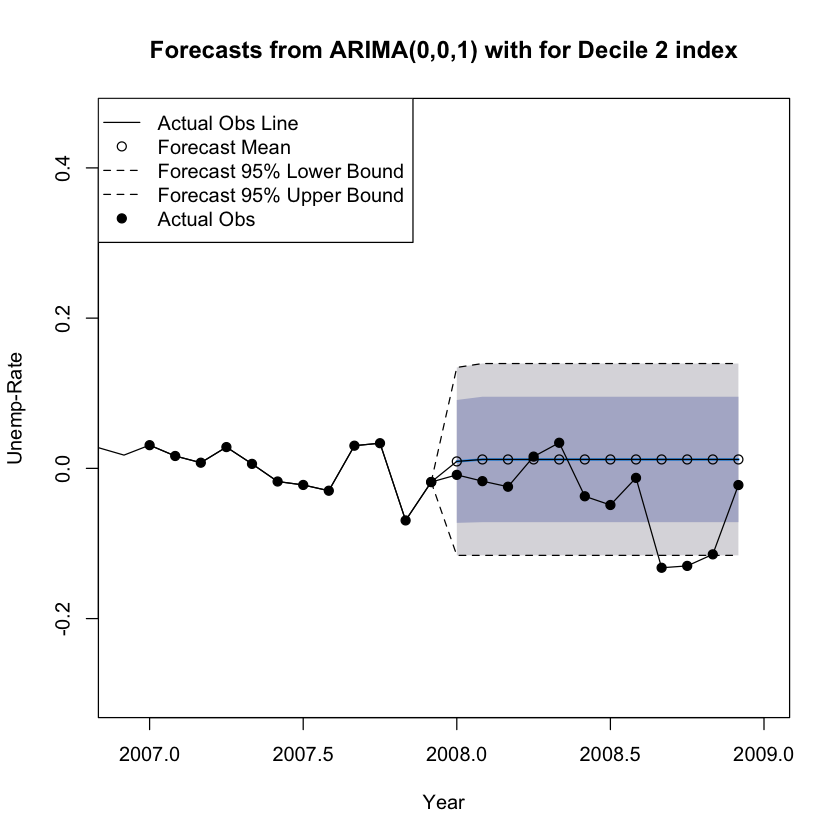

In [22]:
npts = 12
eotr = length(dec2_ts)-npts
h = npts
freq = 12
order = c(0,0,1)
fixed = NULL
seasonal = NULL
dec2_fc_res = plot_forecast_fig(
    da_ts=dec2_ts, eotr=eotr, h=h, npts=npts, frequency=freq, 
    order=order, seasonal=seasonal, fixed=fixed, method='ML', 
    include.mean=T, transform.pars=NULL,
    main="Forecasts from ARIMA(0,0,1) with for Decile 2 index", 
    xlab="Year", ylab="Unemp-Rate"# , ylim=c(5, 11)
)
dec2_fc_tb = comb_forecast_res(dec2_fc_res, dec2_ts, eotr, freq)
dec2_fc_tb

In [17]:
class(dec2_fc_res); attributes(dec2_fc_res); dec2_fc_res$model

[1] "forecast"

$names
 [1] "method"    "model"     "level"     "mean"      "lower"     "upper"    
 [7] "x"         "series"    "fitted"    "residuals"

$class
[1] "forecast"


Call:
arima(x = tr_da_ts, order = order, seasonal = seasonal, include.mean = include.mean, 
    fixed = fixed, method = method)

Coefficients:
         ma1  intercept
      0.2043     0.0119
s.e.  0.0464     0.0036

sigma^2 estimated as 0.004074:  log likelihood = 607.66,  aic = -1211.33

In [20]:
help("predict")

In [21]:
predict(dec2_fc_res$model, 12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.009250982,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122,0.011867122
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,0.06382686,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513,0.06514513


In [23]:
dec2_fc_tb

,Forecast,Std. Error,Actual
Jan 2008,0.009250982,0.06382686,-0.008644
Feb 2008,0.011867122,0.06514513,-0.017025
Mar 2008,0.011867122,0.06514513,-0.024443
Apr 2008,0.011867122,0.06514513,0.015660
May 2008,0.011867122,0.06514513,0.034079
Jun 2008,0.011867122,0.06514513,-0.037152
Jul 2008,0.011867122,0.06514513,-0.048765
Aug 2008,0.011867122,0.06514513,-0.012646
Sep 2008,0.011867122,0.06514513,-0.132327
Oct 2008,0.011867122,0.06514513,-0.129844


# 2-5
- There is some long-range dependency.

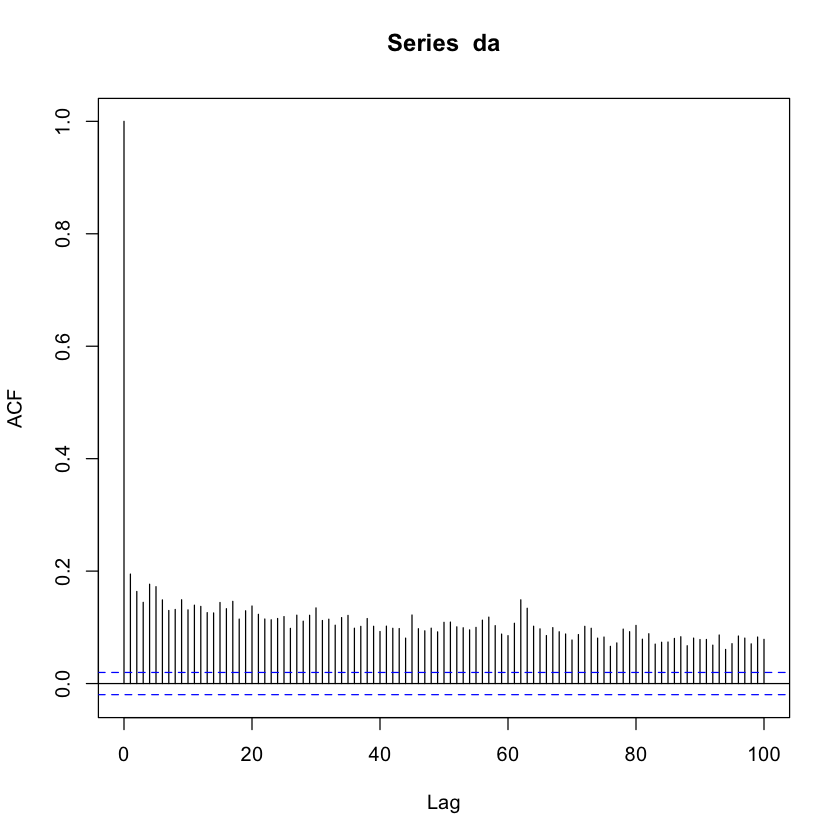

In [25]:
da = read.table("../AFTS_sol/data/d-ibm3dx7008.txt", header = T)
ibm = da$rtn
plot_acf(abs(ibm), lag.max = 100)

# 2-6
- This is a multiplicative seasonal model.
- The seasonal prediction is very good.

In [32]:
da = read.table("../AFTS_sol/data/power6.txt", header = F)
dim(da); da[1:5,]

[1] 264   1

[1] 9.2691 9.2465 9.2639 9.2784 9.3147

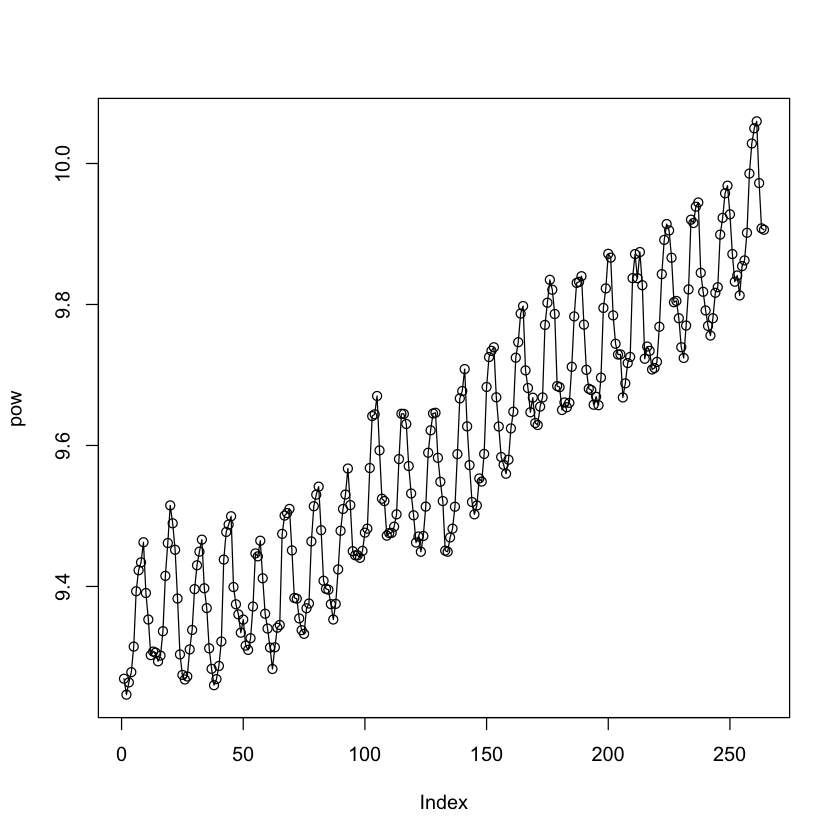

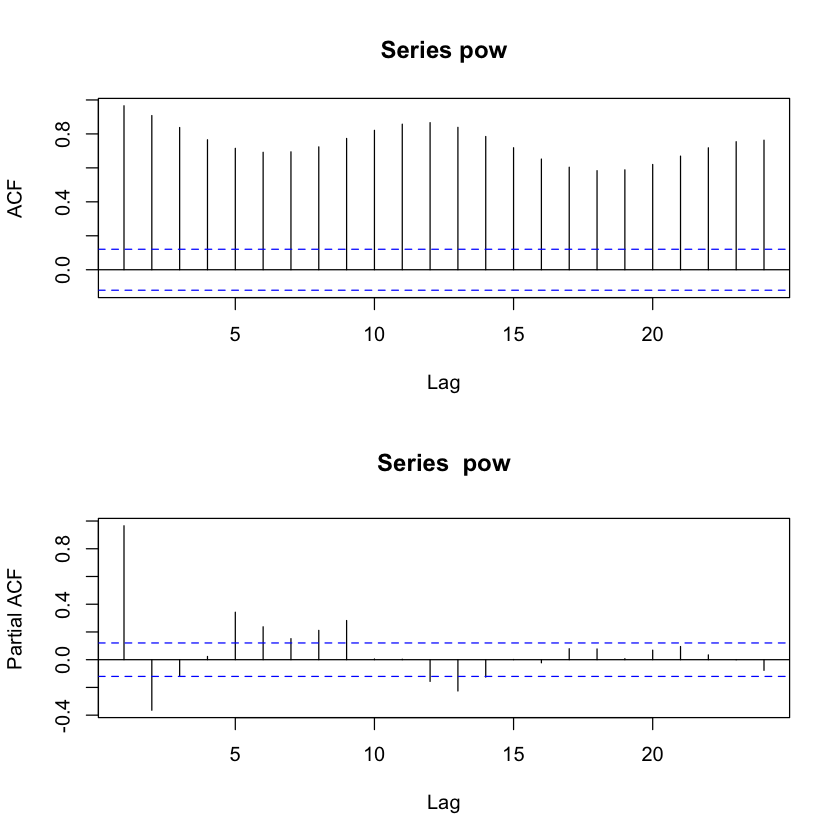

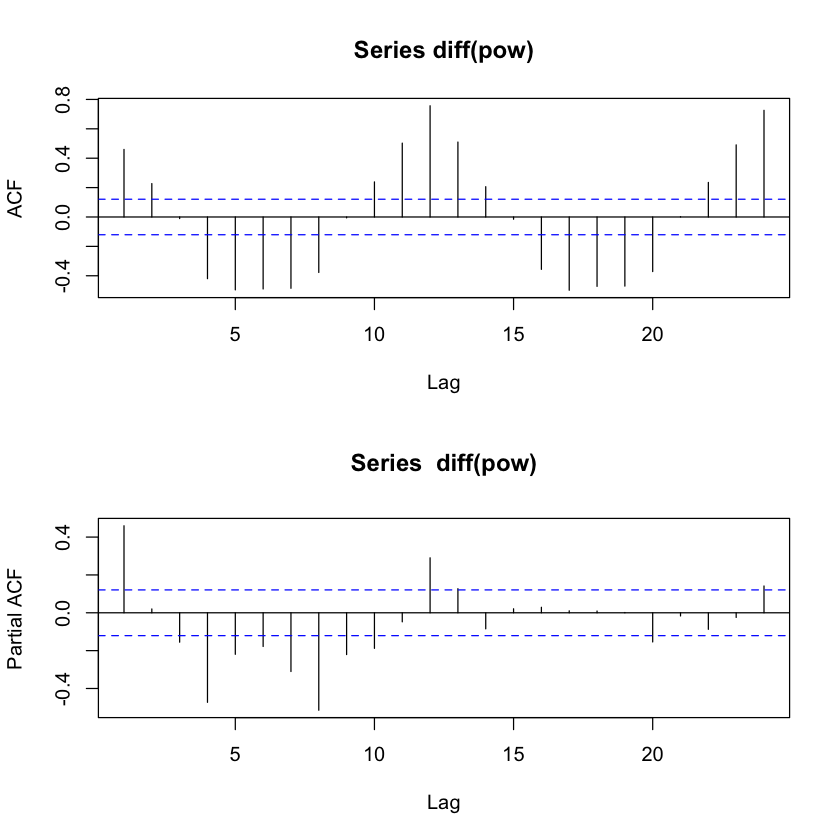

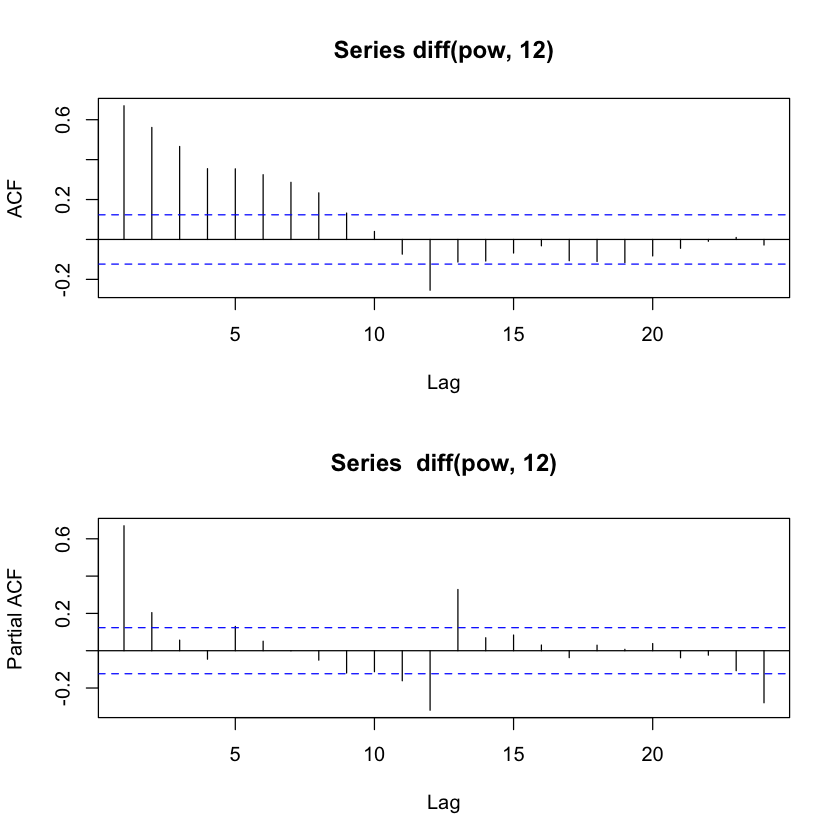

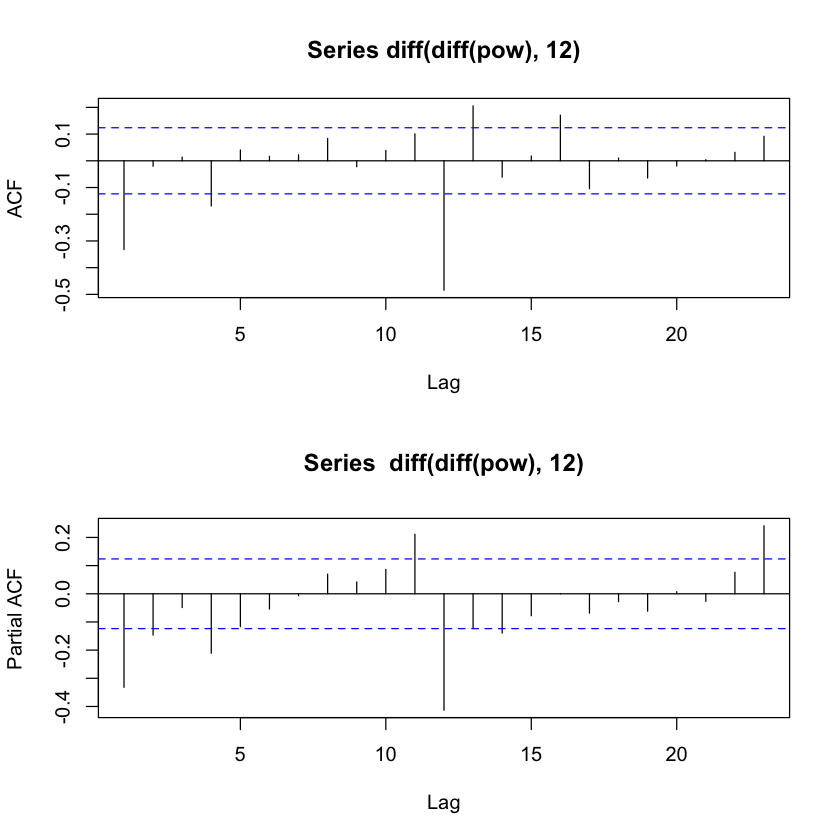

In [40]:
par(bg = 'white')
pow = da[, 1]
plot(pow, type = 'o', ylab = 'pow')
par(mfrow = c(2, 1))
acf(pow)
pacf(pow)
acf(diff(pow))
pacf(diff(pow))
acf(diff(pow, 12))
pacf(diff(pow, 12))
acf(diff(diff(pow), 12))
pacf(diff(diff(pow), 12))


Call:
arima(x = pow, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4865  -0.9664
s.e.   0.0631   0.1179

sigma^2 estimated as 0.0003337:  log likelihood = 633.59,  aic = -1263.17

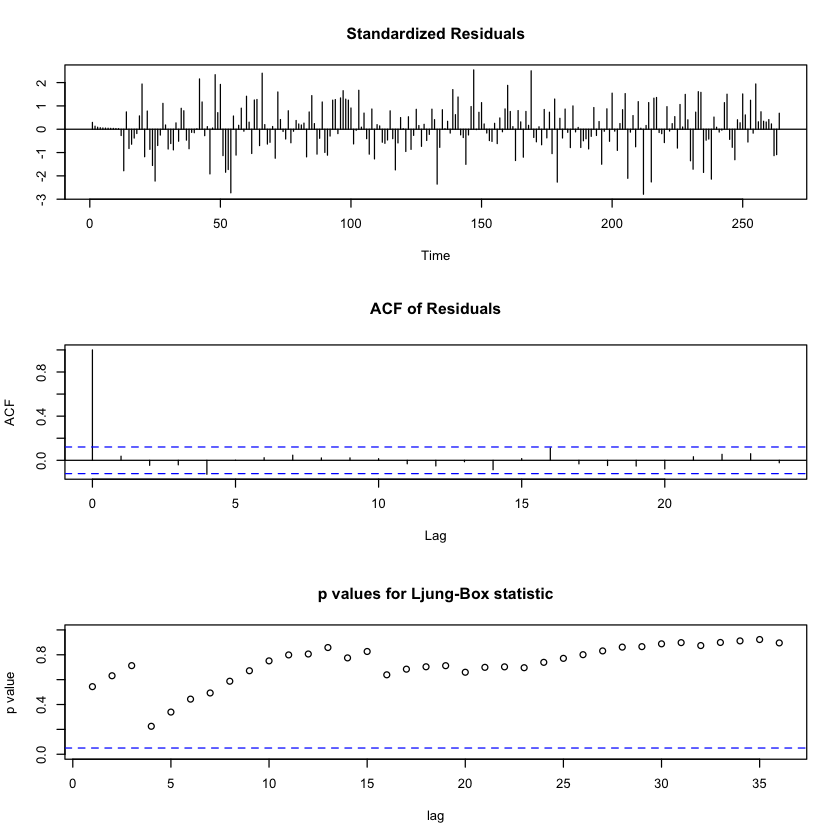

In [42]:
par(bg = 'white')
# FIXME
m1 = arima(pow, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))
m1
tsdiag(m1, gof = 36)
# predict(m1, 24)

[1] 227
2027.917 ; 2032

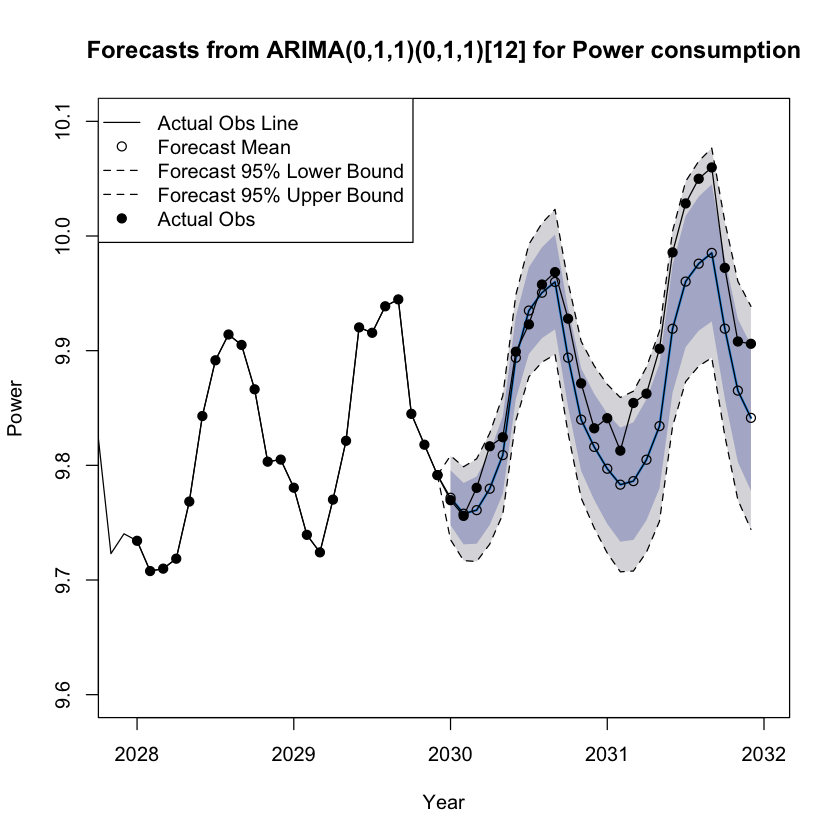

In [43]:
pow_ts = ts(pow, frequency = 12, start = c(2010, 1))
npts = 24
eotr = length(pow_ts)-npts
h = npts
freq = 12
order = c(0,1,1)
fixed = NULL
seasonal = list(order = c(0, 1, 1), period = 12)
pow_fc_res = plot_forecast_fig(
    da_ts=pow_ts, eotr=eotr, h=h, npts=npts, frequency=freq, 
    order=order, seasonal=seasonal, fixed=fixed, method='ML',
    include.mean=T, transform.pars=NULL,
    main="Forecasts from ARIMA(0,1,1)(0,1,1)[12] for Power consumption",
    xlab="Year", ylab="Power", ylim=c(9.6, 10.1)
)

In [44]:
pow_fc_tb = comb_forecast_res(pow_fc_res, pow_ts, eotr, freq)
pow_fc_tb


Forecast method: ARIMA(0,1,1)(0,1,1)[12]

Model Information:

Call:
arima(x = tr_da_ts, order = order, seasonal = seasonal, include.mean = include.mean, 
    fixed = fixed, method = method)

Coefficients:
          ma1     sma1
      -0.5018  -0.9721
s.e.   0.0658   0.1861

sigma^2 estimated as 0.0003399:  log likelihood = 569.22,  aic = -1134.43

Error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0005686413 0.01806016 0.01399088 0.005729905 0.1463576 0.4023562
                   ACF1
Training set 0.04081969

Forecasts:
         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2030       9.771751 9.747797  9.795706 9.735116  9.808386
Feb 2030       9.757840 9.731082  9.784598 9.716917  9.798764
Mar 2030       9.760923 9.731628  9.790219 9.716120  9.805727
Apr 2030       9.779608 9.747979  9.811238 9.731235  9.827981
May 2030       9.808923 9.775120  9.842725 9.757226  9.860619
Jun 2030       9.893825 9.857981  9.92967

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2030,9.771751,9.757840,9.760923,9.779608,9.808923,9.893825,9.934974,9.950545,9.959941,9.893905,9.839844,9.816089
2031,9.797054,9.783142,9.786225,9.804911,9.834225,9.919128,9.960276,9.975848,9.985244,9.919207,9.865146,9.841391


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2030,0.01869168,0.02087972,0.02285928,0.02468057,0.02637639,0.02796959,0.02947680,0.03091061,0.03228079,0.03359514,0.03485996,0.03608048
2031,0.03753313,0.03878805,0.04000363,0.04118335,0.04233020,0.04344678,0.04453538,0.04559800,0.04663642,0.04765221,0.04864679,0.04962145


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2030,9.7696,9.7559,9.7804,9.8166,9.8245,9.8991,9.9229,9.9577,9.9685,9.9279,9.8715,9.8323
2031,9.8411,9.8128,9.8544,9.8625,9.9017,9.9857,10.0284,10.0499,10.0598,9.9722,9.9080,9.9060


,Forecast,Std. Error,Actual
Jan 2030,9.771751,0.01869168,9.7696
Feb 2030,9.757840,0.02087972,9.7559
Mar 2030,9.760923,0.02285928,9.7804
Apr 2030,9.779608,0.02468057,9.8166
May 2030,9.808923,0.02637639,9.8245
Jun 2030,9.893825,0.02796959,9.8991
Jul 2030,9.934974,0.02947680,9.9229
Aug 2030,9.950545,0.03091061,9.9577
Sep 2030,9.959941,0.03228079,9.9685
Oct 2030,9.893905,0.03359514,9.9279


# 2-7

In [1]:
require(xts)
require(sandwich)
require(lmtest)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest



In [3]:
find("read.table")

[1] "package:utils"

In [47]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
da[1:5,]

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1980,1,2,-0.029126,-0.020089,-0.011686,-0.020196,0,0,1,0,0
2,1980,1,3,0.016000,-0.006510,-0.011628,-0.005106,0,0,0,1,0
3,1980,1,4,-0.001969,0.013735,0.015809,0.012355,0,0,0,0,1
4,1980,1,7,-0.003945,0.004368,0.007013,0.002722,1,0,0,0,0
5,1980,1,8,0.067327,0.019340,0.014152,0.020036,0,1,0,0,0


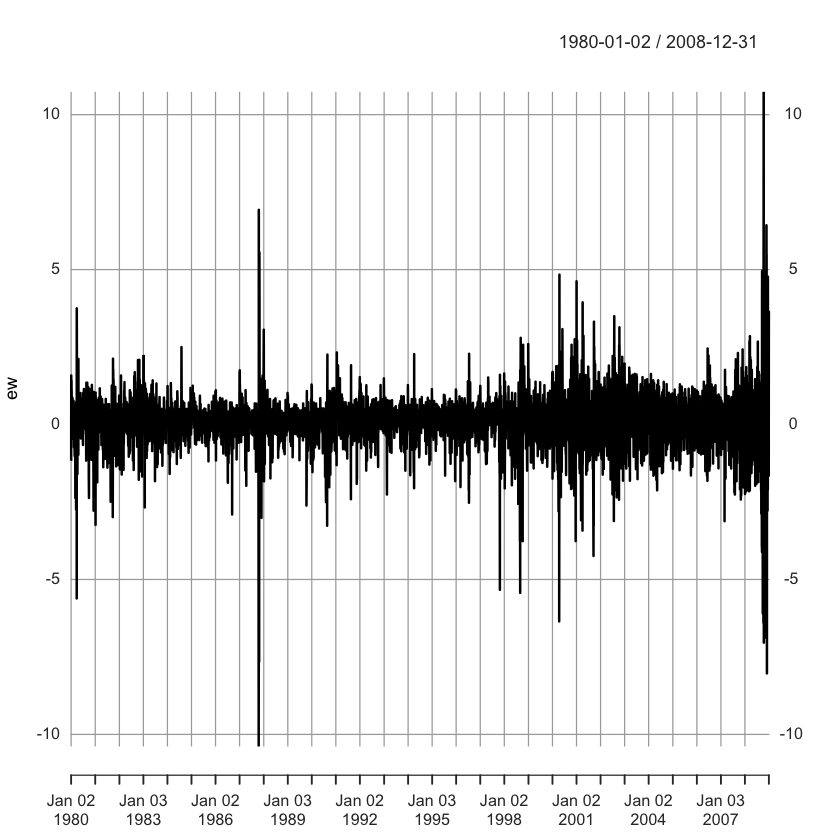

In [48]:
ew = da$ew * 100
plot(
    xts(ew, order.by = as.Date(paste(da$year, da$mom, da$day, sep = '-'))),
    type = 'l', main = '', xlab = 'date', ylab = 'ew'
)

- Trading day effects are all significant.

In [49]:
M = da$M
T = da$T
W = da$W
R = da$R
m1 = lm(ew ~ M + T + W + R)
summary(m1)


Call:
lm(formula = ew ~ M + T + W + R)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2962  -0.3094   0.0533   0.3795  10.8319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.22386    0.02155  10.389  < 2e-16 ***
M           -0.31734    0.03085 -10.286  < 2e-16 ***
T           -0.19778    0.03028  -6.532 6.94e-11 ***
W           -0.10185    0.03027  -3.365 0.000770 ***
R           -0.10294    0.03042  -3.384 0.000719 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8234 on 7314 degrees of freedom
Multiple R-squared:  0.01618,	Adjusted R-squared:  0.01564 
F-statistic: 30.06 on 4 and 7314 DF,  p-value: < 2.2e-16


- Trading day effects are still significant.

In [50]:
find("NeweyWest")

[1] "package:sandwich"

In [51]:
coeftest(m1, NeweyWest(m1, lag = 12, prewhite = F))


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)  0.223862   0.018984  11.7924 < 2.2e-16 ***
M           -0.317340   0.029024 -10.9338 < 2.2e-16 ***
T           -0.197783   0.026948  -7.3395 2.375e-13 ***
W           -0.101854   0.026331  -3.8683 0.0001106 ***
R           -0.102943   0.025381  -4.0560 5.044e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- Residuals have serial correlation.

In [52]:
Box.test(m1$residuals, lag = 12, type = 'Ljung')


	Box-Ljung test

data:  m1$residuals
X-squared = 514.96, df = 12, p-value < 2.2e-16


- Residuals have some autocorrelations.

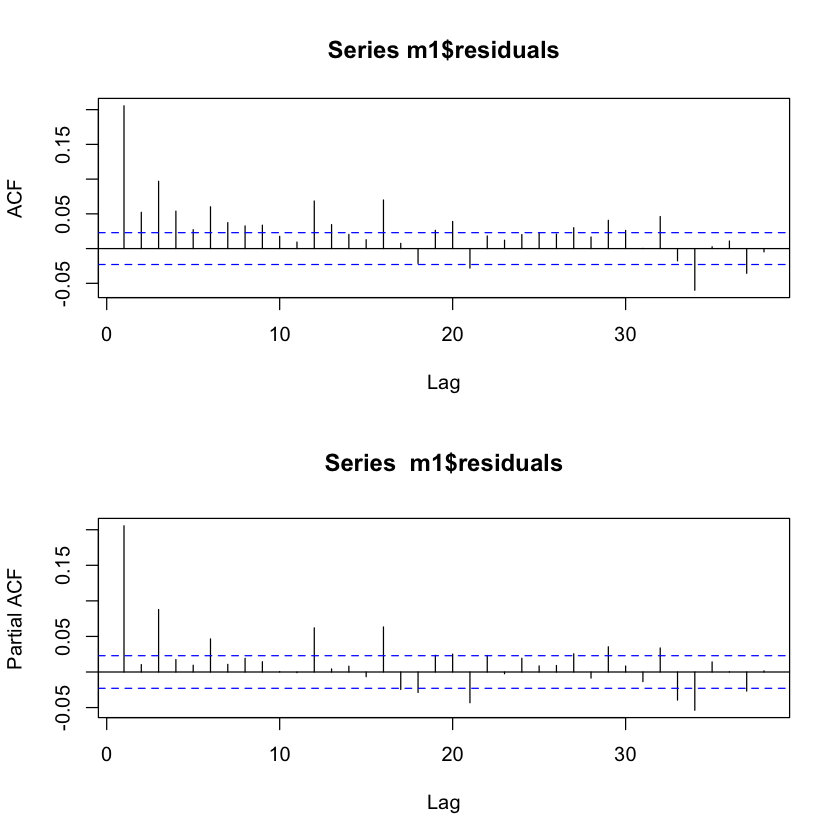

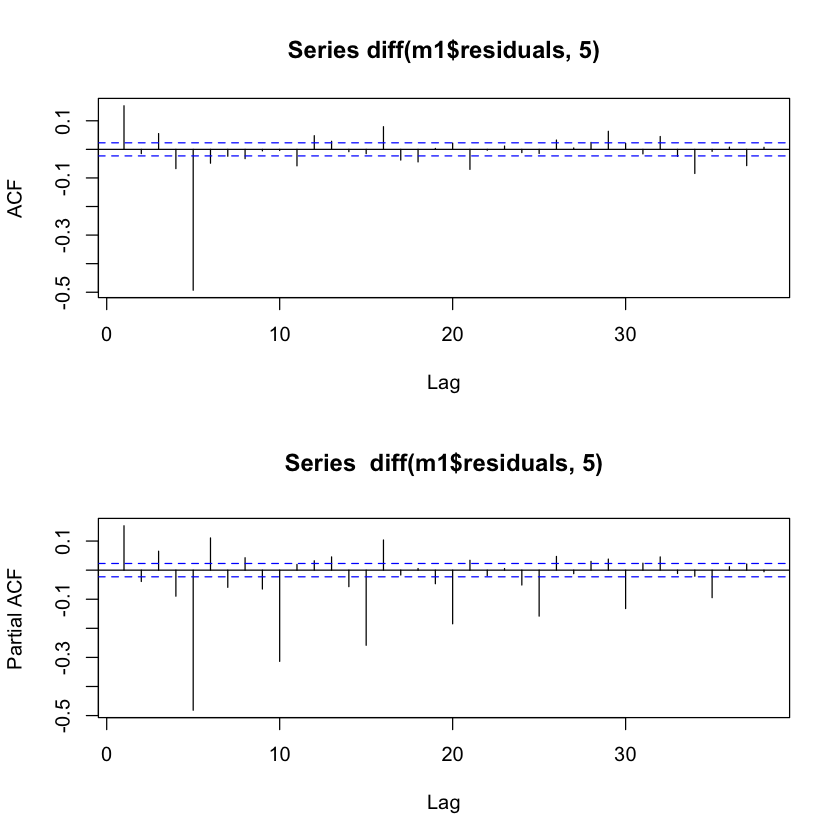

In [53]:
par(mfrow = c(2, 1), bg = 'white')
acf(m1$residuals)
pacf(m1$residuals)
acf(diff(m1$residuals, 5))
pacf(diff(m1$residuals, 5))

- Fit an ARIMA model with time series error.

In [59]:
ew_eacf_res <- perform_and_print_eacf(ew, ar.max = 25, ma.max = 12)

,0,1,2,3,4,5,6,7,8,9,10,11,12
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,0.1991,0.0457,0.09133,0.054374,0.03882,5.56e-02,0.03096,0.02780,0.03645,0.027609,0.004854,0.06137,0.03047
2,-0.0330,-0.0827,0.05637,-0.008304,-0.01521,3.13e-02,-0.01383,-0.00505,0.01116,0.021850,-0.000777,0.05525,-0.01356
3,-0.0796,-0.3413,0.04200,-0.010707,-0.02214,2.35e-02,-0.01466,-0.01345,0.00726,0.001192,-0.013286,0.04953,-0.01297
4,-0.2366,-0.1846,-0.18664,-0.037721,0.00298,-3.29e-03,-0.01294,0.01206,-0.00890,-0.000875,-0.015403,0.04869,-0.00071
5,-0.5000,0.0493,-0.32938,-0.066020,-0.01221,-2.66e-06,-0.00280,-0.00139,-0.00883,-0.001862,-0.010022,0.01152,0.01163
6,-0.4371,-0.1815,-0.36205,-0.142458,0.02558,-6.49e-03,-0.00268,0.00162,-0.00515,-0.006756,-0.014952,0.01954,0.00104
7,-0.1738,-0.3438,-0.42397,0.155797,-0.10697,4.26e-02,0.00701,0.00139,-0.00703,-0.004850,-0.017060,0.01121,0.00826
8,-0.3802,-0.0588,-0.29784,-0.202874,0.04540,4.84e-02,-0.00116,0.00208,-0.01975,0.005105,-0.008692,0.01378,-0.01034
9,-0.4783,0.1760,-0.03593,-0.153479,0.03060,4.32e-02,0.00780,0.06465,-0.01597,0.002325,-0.013141,0.00941,-0.00838


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,x,x,x,x,x,x,x,x,x,x,o,x,x
1,x,x,x,o,o,x,o,o,o,o,o,x,o
2,x,x,x,o,o,x,o,o,o,o,o,x,o
3,x,x,x,x,o,o,o,o,o,o,o,x,o
4,x,x,x,x,o,o,o,o,o,o,o,o,o
5,x,x,x,x,x,o,o,o,o,o,o,o,o
6,x,x,x,x,x,x,o,o,o,o,o,o,o
7,x,x,x,x,x,x,o,o,o,o,o,o,o
8,x,x,x,x,x,x,o,x,o,o,o,o,o
9,x,x,x,x,x,x,x,x,x,x,o,o,o


[1] 0.02337783

AR/MA
   0 1 2 3 4 5 6 7 8 9 10 11 12
0  x x x x x x x x x x o  x  x 
1  x x x o o x o o o o o  x  o 
2  x x x o o x o o o o o  x  o 
3  x x x x o o o o o o o  x  o 
4  x x x x o o o o o o o  o  o 
5  x x x x x o o o o o o  o  o 
6  x x x x x x o o o o o  o  o 
7  x x x x x x o o o o o  o  o 
8  x x x x x x o x o o o  o  o 
9  x x x x x x x x x x o  o  o 
10 x x x x x x x x x o o  o  o 
11 x x x x x x x x x x o  o  o 
12 x x o x x x x x x x o  o  o 
13 x x o x x x x x x x o  o  x 
14 x x o x x x x x o x x  x  x 
15 x x o x x x x x x x x  x  x 
16 x x x x x x x x x x x  x  x 
17 x x x x o x o x o x o  x  x 
18 x x x x x x o o x x x  o  x 
19 x x x x x o x x o x x  x  x 
20 x x x o x x x x o x x  x  x 
21 x x x o x x x x x x x  x  o 
22 x x x o x x x x x x x  o  x 
23 x x x o x x x x x x x  o  x 
24 x x x x x x x x x x o  x  x 
25 x x x x x x x x x x o  x  x 


In [54]:
da[1:5, 8:11]

,M,T,W,R
,<int>,<int>,<int>,<int>
1,0,0,1,0
2,0,0,0,1
3,0,0,0,0
4,1,0,0,0
5,0,1,0,0



Call:
arima(x = ew, order = c(2, 0, 2), seasonal = list(order = c(1, 0, 0), period = 5), 
    xreg = da[, 8:11])

Coefficients:
         ar1     ar2      ma1      ma2    sar1  intercept        M        T
      0.5409  0.3211  -0.3431  -0.4035  -0.041     0.2242  -0.3171  -0.1982
s.e.  0.0950  0.0731   0.0928   0.0580   0.013     0.0239   0.0267   0.0280
            W        R
      -0.1058  -0.0987
s.e.   0.0282   0.0263

sigma^2 estimated as 0.6412:  log likelihood = -8759.03,  aic = 17538.07

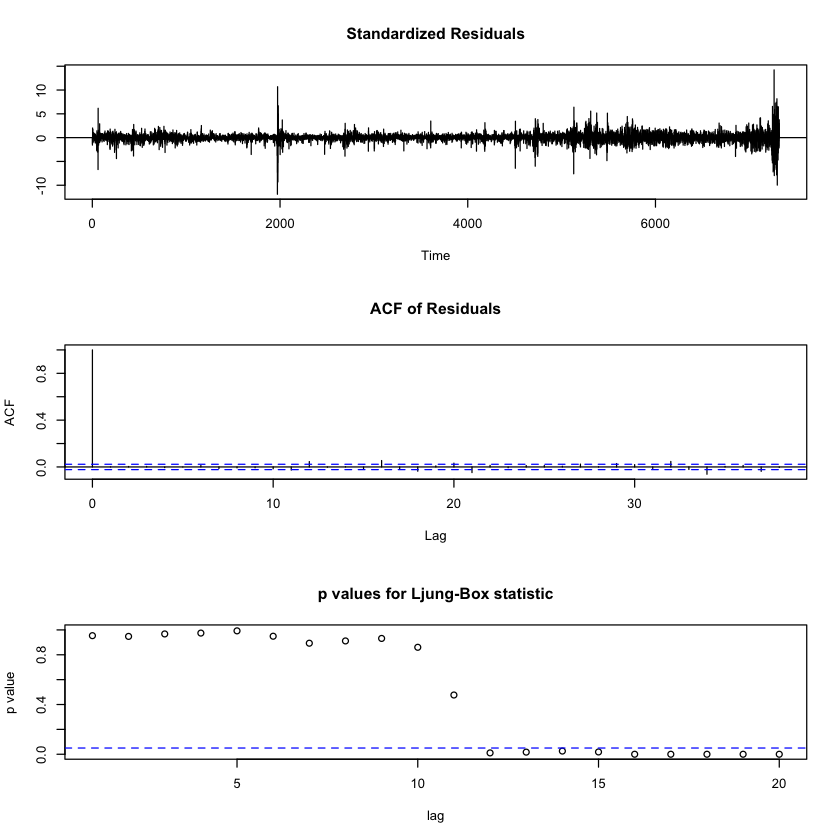

In [56]:
par(bg = 'white')
m2 = arima(
    ew, order = c(2, 0, 2), 
    seasonal = list(order = c(1, 0, 0), period = 5), 
    xreg = da[, 8:11]
)
m2
tsdiag(m2, gof = 20)


Call:
arima(x = ew, order = c(2, 0, 3), seasonal = list(order = c(1, 0, 0), period = 5), 
    xreg = da[, 8:11])

Coefficients:
         ar1     ar2      ma1      ma2      ma3     sar1  intercept        M
      0.4950  0.3675  -0.2966  -0.4397  -0.0099  -0.0412     0.2242  -0.3169
s.e.  0.1635  0.1548   0.1639   0.1209   0.0296   0.0131     0.0240   0.0267
            T        W        R
      -0.1983  -0.1056  -0.0986
s.e.   0.0280   0.0282   0.0263

sigma^2 estimated as 0.6412:  log likelihood = -8758.99,  aic = 17539.97

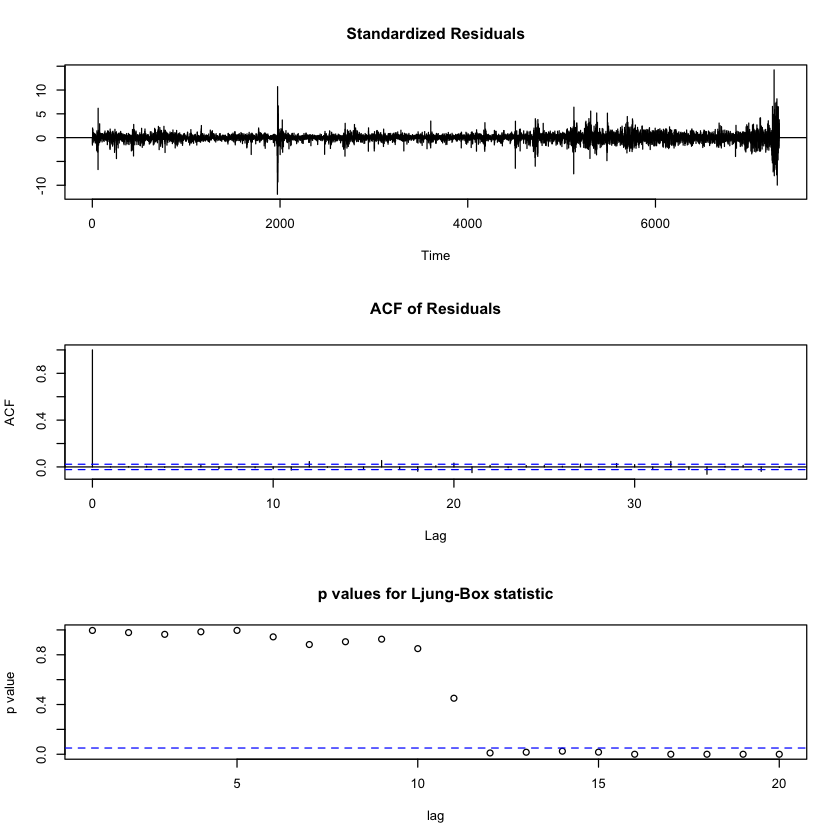

In [58]:
par(bg = 'white')
m3 = arima(
    ew, order = c(2, 0, 3), 
    seasonal = list(order = c(1, 0, 0), period = 5), 
    xreg = da[, 8:11]
)
m3
tsdiag(m3, gof = 20)

# 2-8

In [60]:
require(xts)

In [4]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
dim(da); da[1:5,]

[1] 7319   12

,year,mom,day,ibm,vw,ew,sp,M,T,W,R,F
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1980,1,2,-0.029126,-0.020089,-0.011686,-0.020196,0,0,1,0,0
2,1980,1,3,0.016000,-0.006510,-0.011628,-0.005106,0,0,0,1,0
3,1980,1,4,-0.001969,0.013735,0.015809,0.012355,0,0,0,0,1
4,1980,1,7,-0.003945,0.004368,0.007013,0.002722,1,0,0,0,0
5,1980,1,8,0.067327,0.019340,0.014152,0.020036,0,1,0,0,0


In [61]:

sp = da$sp * 100
plot(
    xts(sp, order.by = as.Date(paste(da$year, da$mom, da$day, sep = '-'))),
    type = 'l', main = '', xlab = 'date', ylab = 'sp'
)
M = da$M
T = da$T
W = da$W
R = da$R
F = da$F
m1 = lm(sp ~ M + T + W + R + F + 0)
summary(m1)

ERROR: Error in if (!header) rlabp <- FALSE: the condition has length > 1


## (a)

In [ ]:
da = read.table("../AFTS_sol/data/d-ibm3dxwkdays8008.txt", header = T)
da[1:5,]

## (b)